In [1]:
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
import shapely.geometry
from shapely.geometry import Point
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import math
import os, sys

from skimage.feature import hog
from skimage import data, exposure

In [2]:
survey = "HI1522_TE10"

path = '..//..//..//Documents//Test_sets//Testing_Sample//HI1522_TE10//Edits//'
pathshp = '..//..//..//Documents//Test_sets//Testing_Sample//HI1522_TE10'

array = np.load(path + 'array10m//arraymin_1.npy')
arraySS = np.load(path + 'array10m//arraySS_1.npy')

geosurveyp = pd.read_csv(path + 'HI1522_TE10_1_EPSG3035')
ss = pd.read_csv(path+'HI1522_TE10_SS_1.csv')

breakdown = 1

In [3]:
step = 10
savepath = '..//..//..//Documents//Test_sets//Testing_Sample//HOG_testsets_'+str(step)+'m//Min_WA//'

In [4]:
minx = geosurveyp['Xp'].min()
maxx = geosurveyp['Xp'].max()
rangex = maxx-minx

print (minx, maxx, rangex)

miny = geosurveyp['Yp'].min()
maxy = geosurveyp['Yp'].max()
rangey = maxy-miny

print ( miny, maxy, rangey)

minz = geosurveyp['Depth'].min()
maxz = geosurveyp['Depth'].max()

3701028.72215 3704387.36644 3358.64428728
3217505.04754 3222923.0042 5417.95665599


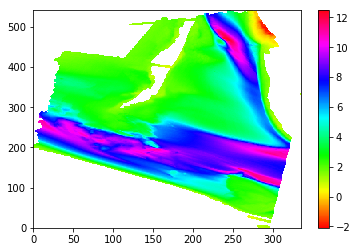

In [5]:
col = math.ceil(rangex/step)
row = math.ceil(rangey/step)

xi = np.arange(0, col)
yi = np.arange(0, row)
X, Y = np.meshgrid(xi, yi)
Z = array[Y,X]

import numpy.ma as ma
Lm = ma.masked_where(np.isnan(Z),Z)

plt.pcolor(X, Y, Lm, cmap='hsv', vmin=minz, vmax=maxz)
plt.colorbar()

plt.show()

In [6]:
array.shape

(542, 336)

In [7]:

#array[np.isnan(array)] = np.nanmin(array)

# array[np.isnan(array)] = -1

In [8]:
# print(np.nanmin(array))

In [9]:
# val = float(np.nanmin(array)) - 1
# print(val)

In [10]:
# array[np.isnan(array)] = val

In [11]:
# print(np.nanmin(array),val)

/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


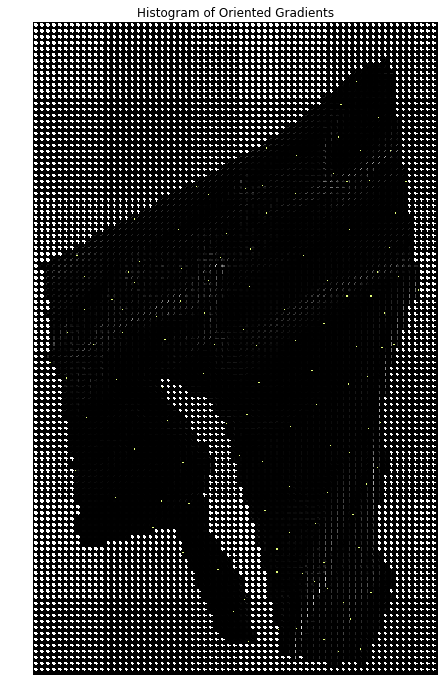

In [12]:
image = array

fd, hog_image = hog(image, orientations=4, pixels_per_cell=(5,5), cells_per_block=(1,1), visualise=True, feature_vector= False)

fig, (ax2) = plt.subplots(figsize=(12, 12))

#moved up arraySS = np.load(path + 'array5m//arraySS.npy')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

import numpy.ma as ma
Zm = ma.masked_equal(arraySS, 0)

ax2.axis('off')
im1 = ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
im2 = ax2.imshow(Zm,cmap=plt.cm.Wistia)
ax2.set_title('Histogram of Oriented Gradients')
# ax1.set_adjustable('box-forced')
plt.show()

In [13]:
fd.shape

(108, 67, 1, 1, 4)

In [14]:

HOG_output = pd.DataFrame()

In [15]:
rowH = int(fd.shape[0])
colH = int(fd.shape[1])

In [16]:
for r in range(0,fd.shape[0]):
    for c in range(0,fd.shape[1]):
        for a in range(0,1):
            for b in range(0,1):
                rown = [r,c,(fd[r][c][a][b][0]),(fd[r][c][a][b][1]),(fd[r][c][a][b][2]),(fd[r][c][a][b][3])]
                HOG_output = HOG_output.append([rown])
                print (fd[r][c][a][b])

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.17802204  0.82191308  0.          0.        ]
[ 0.          0.96403766  0.01198624  0.02379027]
[ 0.          0.48768112  0.44843286  0.06341163]
[ 0.12378731  0.48897192  0.3627313   0.02390725]
[ 0.11062451  0.53511905  0.31259939  0.04096809]
[ 0.09900257  0.21775601  0.68292141  0.        ]
[ 0.04957429  0.50775649  0.36788984  0.07443726]
[ 0.02044647  0.17040134  0.64810752  0.16065772]
[ 0.01581769  0.          0.

[ 0.71122545  0.          0.044783    0.24357503]
[ 0.30028226  0.1983871   0.19102752  0.30954902]
[ 0.08061815  0.5727197   0.28056281  0.06569488]
[ 0.06323583  0.91152108  0.02499492  0.        ]
[ 0.1944185   0.37441972  0.18055465  0.24990225]
[ 0.73927478  0.20382611  0.          0.05639566]
[ 0.78474419  0.21514284  0.          0.        ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.0619099   0.93805505  0.          0.        ]
[ 0.05876814  0.94119255  0.          0.        ]
[ 0.          0.99992272  0.          0.        ]
[ 0.          0.99990867  0.          0.        ]
[ 0.          0.99082926  0.00902635  0.        ]
[ 0.12277361  0.57494262  0.16220102  0.13964047]
[ 0.4603682   0.37764319  0.          0.16141219]
[ 0.48075611  0.45737283  0.          0.06113839]
[ 0.31075056  0.16537792  0.13708897  0.38529431]
[ 0.25241982  0.42906079  0.17341326  0.14386487]
[ 0.06396286  0.81532607  0.07916045  0.04089905]
[ 0.29945023  0.26003745  0.32174485  0.11850198]
[ 0.2837483   0.          0.02790909  0.68830709]
[ 0.63473667  0.          0.          0.36500817]
[ 0.60355472  0.04811192  0.12780281

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.99995015  0.          0.        ]
[ 0.          0.99995923  0.          0.        ]
[ 0.          0.99995683  0.          0.        ]
[ 0.          0.99994756  0.          0.        ]
[ 0.         0.9998987  0.         0.       ]
[ 0.          0.99985902  0.          0.        ]
[ 0.10720868  0.892688

[ 0.          0.65714715  0.34246183  0.        ]
[ 0.04348989  0.30923576  0.42187479  0.22477828]
[ 0.          0.98173327  0.01807743  0.        ]
[ 0.          0.99992232  0.          0.        ]
[ 0.          0.90736583  0.03662968  0.05594923]
[ 0.58900036  0.30887886  0.          0.10191981]
[ 0.25149376  0.66256092  0.04160432  0.04406255]
[ 0.19272786  0.78163527  0.02543233  0.        ]
[ 0.87695541  0.12291791  0.          0.        ]
[ 0.37008784  0.51161317  0.0842849   0.03379906]
[ 0.          0.99569991  0.          0.00423316]
[ 0.          0.98594703  0.          0.0139929 ]
[ 0.10252476  0.82387718  0.04939705  0.02411173]
[ 0.          0.98236693  0.          0.01757578]
[ 0.02509635  0.97473627  0.          0.        ]
[ 0.35296273  0.47670094  0.11702238  0.05257224]
[ 0.40068155  0.56823302  0.          0.03087307]
[ 0.32264892  0.67725219  0.          0.        ]
[ 0.41271248  0.54750341  0.03972145  0.        ]
[ 0.12104227  0.83954762  0.03936243  0.        ]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.99991248  0.          0.        ]
[ 0.          0.99995367  0.          0.        ]
[ 0.          0.99996214  0.          0.        ]
[ 0.         0.9999609  0.         0.       ]
[ 0.          0.99994633  0.          0.        ]
[ 0.          0.99994026  0.          0.        ]
[ 0.          0.99992552  0.          0.        ]
[ 0.          0.99992768  0.          0.        ]
[ 0.          0.99993871  0.          0.        ]
[ 0.          0.99052055  0.00940688  0.        ]
[ 0.15014445  0.8497951   0.          0.        ]
[ 0.08768544  0.9122321   0.          0.        ]
[ 0.15908771  0.3872408   0.26283961  0.19030591]
[ 0.          0.89425734  0.10551484  0.      

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.99988748  0.          0.        ]
[ 0.          0.99993758  0.          0.        ]
[ 0.         0.9999605  0.         0.       ]
[ 0.          0.99995968  0.          0.        ]
[ 0.          0.99995607  0.          0.        ]
[ 0.          0.99993924  0.          0.        ]
[ 0.04765253  0.95226819  0.          0.        ]
[ 0.          0.99991268  0.          0.        ]
[ 0.          0.99991854  0.          0.        ]
[ 0.05018024  0.94974214  0.          0.        ]
[ 0.08594329  0.91396515  0.          0.        ]
[ 0.31763776  0.67592549  0.00636901  0.        ]
[ 0.37764039  0.6223103   0.          0.        ]
[ 0.          0.23056756  0.37321186  0.39610289]
[ 0.13293069  0.30217977  0.39291121  0.17185577]
[ 0.42617078  0.57369792  0.          0.        ]
[ 0.15923169  0.84068685  0.

[ 0.          0.99995481  0.          0.        ]
[ 0.          0.99995787  0.          0.        ]
[ 0.          0.99994895  0.          0.        ]
[ 0.          0.99992305  0.          0.        ]
[ 0.          0.99989276  0.          0.        ]
[ 0.          0.99989368  0.          0.        ]
[ 0.05846239  0.94142409  0.          0.        ]
[ 0.05886664  0.94103656  0.          0.        ]
[ 0.          0.99991936  0.          0.        ]
[ 0.          0.99983439  0.          0.        ]
[ 0.6869046   0.28178792  0.          0.03105032]
[ 0.40473688  0.38257471  0.02190039  0.19070156]
[ 0.25903652  0.74091895  0.          0.        ]
[ 0.22750665  0.36749389  0.32685539  0.07808682]
[ 0.22664042  0.27766916  0.49563583  0.        ]
[ 0.          0.91156608  0.08838369  0.        ]
[ 0.05168928  0.13807395  0.46157545  0.34854009]
[ 0.02819432  0.          0.50253093  0.46917512]
[ 0.23944806  0.22620225  0.35074492  0.18347681]
[ 0.12323161  0.10539191  0.32426691  0.44700958]


[ 0.04683592  0.95304026  0.          0.        ]
[ 0.         0.9998884  0.         0.       ]
[ 0.          0.99988465  0.          0.        ]
[ 0.         0.9999034  0.         0.       ]
[ 0.          0.99991261  0.          0.        ]
[ 0.04880653  0.95109515  0.          0.        ]
[ 0.04142218  0.94673815  0.01166454  0.        ]
[ 0.1614213   0.64676367  0.13551917  0.05557684]
[ 0.75515386  0.21607725  0.02828382  0.        ]
[ 0.6987173   0.18157657  0.          0.11963228]
[ 0.43832245  0.5167927   0.02962572  0.01517274]
[ 0.54708042  0.15044752  0.17843837  0.12390362]
[ 0.13947894  0.74562098  0.06526124  0.04955303]
[ 0.02320481  0.9172227   0.05951111  0.        ]
[ 0.03203124  0.16128371  0.70984993  0.09676696]
[ 0.29561734  0.26244245  0.21196276  0.22987805]
[ 0.12256931  0.44182727  0.38306247  0.05233357]
[ 0.02727033  0.29979968  0.28719421  0.38553144]
[ 0.60676042  0.34035372  0.01464876  0.03805512]
[ 0.01863965  0.57306933  0.40818489  0.        ]
[ 0.    

[ 0.36870799  0.50422707  0.01877903  0.1080956 ]
[ 0.73100913  0.06093467  0.01306076  0.19489262]
[ 0.67164885  0.32827173  0.          0.        ]
[ 0.79114668  0.20880268  0.          0.        ]
[ 0.43260919  0.35163212  0.13267205  0.08304884]
[ 0.22036155  0.23527523  0.41453804  0.12977836]
[ 0.46271173  0.0981223   0.17290714  0.266123  ]
[ 0.13808219  0.861789    0.          0.        ]
[ 0.41207099  0.48167798  0.          0.10618789]
[ 0.06664249  0.72226357  0.21104245  0.        ]
[ 0.          0.99998024  0.          0.        ]
[ 0.06590372  0.89672991  0.03733789  0.        ]
[ 0.30474561  0.5944415   0.05849262  0.04223794]
[ 0.25056376  0.59847033  0.12176787  0.02916899]
[ 0.19644096  0.68288684  0.10159508  0.01903793]
[ 0.          0.78125434  0.21871056  0.        ]
[ 0.07115584  0.92881023  0.          0.        ]
[ 0.02376417  0.71840778  0.11293316  0.14482091]
[ 0.          0.73240511  0.26746924  0.        ]
[ 0.85591967  0.0222571   0.06157917  0.06020306]


[ 0.68292042  0.12606058  0.03139987  0.15940186]
[ 0.293266    0.68427457  0.00514785  0.01723804]
[ 0.09835757  0.90160934  0.          0.        ]
[ 0.          0.8973779   0.10258203  0.        ]
[ 0.1381536   0.86180592  0.          0.        ]
[ 0.05630232  0.94367214  0.          0.        ]
[ 0.          0.99996653  0.          0.        ]
[ 0.1394102   0.86048878  0.          0.        ]
[ 0.52476433  0.15339126  0.          0.32173762]
[ 0.33215306  0.66775269  0.          0.        ]
[ 0.27783734  0.63455725  0.08744695  0.        ]
[ 0.12225919  0.38421132  0.17410893  0.31901994]
[ 0.          0.38685064  0.52810732  0.08469218]
[ 0.02264336  0.2897223   0.42817117  0.25901066]
[ 0.14775088  0.10790998  0.30841086  0.43543684]
[ 0.25217629  0.11410884  0.32710645  0.30616471]
[ 0.51188534  0.16561655  0.16802432  0.15427346]
[ 0.40643043  0.34350958  0.11419028  0.13542473]
[ 0.29409834  0.08944055  0.08169272  0.53446829]
[ 0.60079593  0.12027114  0.          0.27884784]


[ 0.49300313  0.50694855  0.          0.        ]
[ 0.61274538  0.3871752   0.          0.        ]
[ 0.29491834  0.70500586  0.          0.        ]
[ 0.87097133  0.12892642  0.          0.        ]
[ 0.18962367  0.69443249  0.11578829  0.        ]
[ 0.85889867  0.09802264  0.          0.04281285]
[ 0.43751214  0.24510145  0.11883026  0.19809663]
[ 0.48844241  0.51129358  0.          0.        ]
[ 0.58911963  0.19670841  0.09943472  0.11405617]
[ 0.41934434  0.09299172  0.29044465  0.1964736 ]
[ 0.63180546  0.28811173  0.02607437  0.05388421]
[ 0.20210741  0.27124913  0.43513938  0.09136646]
[ 0.26118786  0.41737115  0.13894615  0.18234913]
[ 0.62714123  0.19855341  0.11775276  0.05645921]
[ 0.          0.23819812  0.19970316  0.56199265]
[ 0.19712713  0.20052237  0.07066637  0.53151477]
[ 0.04134123  0.93999179  0.01862369  0.        ]
[ 0.0162862  0.9836642  0.         0.       ]
[ 0.2137809   0.60351675  0.08962611  0.09284301]
[ 0.3017896   0.          0.26369625  0.43433033]
[ 0.

[ 0.60551225  0.30311369  0.          0.09102927]
[ 0.72341719  0.22390761  0.          0.05221779]
[ 0.75513176  0.04903483  0.          0.19537861]
[ 0.7071953   0.          0.          0.29247447]
[ 0.49674885  0.07293531  0.20217144  0.22739663]
[ 0.063708    0.64057316  0.18437461  0.11057838]
[ 0.03270843  0.77438473  0.17590384  0.01674451]
[ 0.21106977  0.41841444  0.31027463  0.06001809]
[ 0.38313312  0.29019659  0.17860115  0.14795693]
[ 0.03338273  0.28521672  0.24952253  0.43179336]
[ 0.          0.87283673  0.12702603  0.        ]
[ 0.2143555   0.27804626  0.35283111  0.15434021]
[ 0.23625227  0.59006421  0.08600084  0.08703945]
[ 0.02241552  0.85019483  0.127037    0.        ]
[ 0.          0.45485102  0.45539181  0.08938759]
[ 0.08555723  0.          0.21380275  0.70026177]
[ 0.65778597  0.01267297  0.          0.3294239 ]
[ 0.29153934  0.1683177   0.07314043  0.46688467]
[ 0.          0.23531406  0.7645716   0.        ]
[ 0.          0.1043592   0.82790097  0.06764312]


[ 0.          0.          0.40968534  0.59005789]
[ 0.          0.01274945  0.58752481  0.39953194]
[ 0.33678516  0.28638455  0.          0.3762553 ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.15103507  0.67938854  0.16939398]
[ 0.          0.          0.53861421  0.46116043]
[ 0.          0.          0.49632872  0.50336705]
[ 0.          0.10404193  0.57322268  0.32207802]
[ 0.03728896  0.05830913  0.29421514  0.60952841]
[ 0.07865195  0.08852198  0.52170533  0.31057167]
[ 0.67056644  0.03820699  0.          0.29076118]
[ 0.207032    0.02351659  0.0261542   0.74289766]
[ 0.11943376  0.          0.          0.88020922]
[ 0.          0.11028392  0.72243402  0.16676144]
[ 0.08570165  0.2306143   0.62421302  0.0591019 ]
[ 0.29442262  0.47127931  0.19550603  0.03844544]
[ 0.0177062   0.20079103  0.32332823  0.45756069]
[ 0.04191655  0.10812644  0.64448458  0.20501907]
[ 0.08581048  0.47777006  0.43585864  0.        ]
[ 0.31778745  0.33469545  0.23468765  0.11186112]
[ 0.27

[ 0.14017521  0.21010168  0.57177347  0.07659974]
[ 0.05492417  0.08217832  0.30609877  0.55608986]
[ 0.          0.04465178  0.84361738  0.11105461]
[ 0.          0.          0.63869394  0.36122166]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.99989067  0.        ]
[ 0.          0.          0.36860006  0.63124693]
[ 0.          0.          0.24316044  0.75649013]
[ 0.07541143  0.          0.16336139  0.7606877 ]
[ 0.4057376   0.          0.          0.59371883]
[ 0.1632399   0.          0.          0.83609937]
[ 0.          0.0461041   0.67973371  0.27375035]
[ 0.          0.          0.59379143  0.40581275]
[ 0.56666227  0.          0.          0.43283065]
[ 0.30265345  0.08072989  0.40064723  0.21497494]
[ 0.04281475  0.3084568   0.21753795  0.43039648]
[ 0.22770927  0.16608796  0.49738961  0.10769185]
[ 0.47196347  0.20626641  0.04395806  0.276740

[ 0.13327326  0.47190166  0.39459062  0.        ]
[ 0.36989917  0.25619561  0.          0.37353943]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.15034422  0.84953983  0.        ]
[ 0.          0.          0.99991787  0.        ]
[ 0.          0.          0.44868222  0.55114507]
[ 0.          0.          0.69480034  0.30493687]
[ 0.11605074  0.37486417  0.33926474  0.16936527]
[ 0.          0.          0.          0.99972481]
[ 0.          0.          0.08163439  0.91798579]
[ 0.          0.          0.17973702  0.81982257]
[ 0.01402427  0.48558978  0.4592514   0.04060143]
[ 0.05686419  0.71646596  0.22624049  0.        ]
[ 0.         0.7338473  0.2657998  0.       ]
[ 0.          0.96655404  0.03319486  0.        ]
[ 0.          0.75170357  0.24795074  0.        ]
[ 0.58734632  0.1252893   0.1153754   0.17145646]
[ 0.7662645   0.03716295  0.05639715  0.13982349]
[ 0.69172962  0.253113

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.59673758  0.21553851  0.          0.18710028]
[ 0.26866783  0.          0.04502586  0.68619652]
[ 0.68233374  0.21830579  0.01579623  0.08325445]
[ 0.10852894  0.10509213  0.52709368  0.25858931]
[ 0.          0.32918805  0.45169108  0.21875052]
[ 0.04794238  0.66571033  0.28595827  0.        ]
[ 0.          0.          0.32940965  0.6702193 ]
[ 0.24674915  0.          0.14657485  0.60628314]
[ 0.45354665  0.25914553  0.13641289  0.15057773]
[ 0.99964936  0.          0.          0.        ]
[ 0.80481183  0.19474422  0.          0.        ]
[ 0.95777387  0.02760191  0.          0.01439626]
[ 0.96823717  0.          0.01805615  0.01347272]
[ 0.89118561  0.04238778  0.          0.06611766]
[ 0.87667712  0.12303132  0.          0.        ]
[ 0.99976239  0.          0.          0.        ]
[ 0.99975699  0.          0.          0.        ]
[ 0.85425647  0.          0.          0.1454837 ]
[ 0.86420829  0.          0.      

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.20551458  0.          0.02506246  0.76917397]
[ 0.16295163  0.04283559  0.1537533   0.63984607]
[ 0.46762482  0.07609136  0.0822234   0.37350835]
[ 0.37429661  0.54448053  0.05000028  0.03041655]
[ 0.70121103  0.18629923  0.04308387  0.06879803]
[ 0.75621141  0.09321057  0.          0.1502123 ]
[ 0.59690139  0.29170608  0.03299533  0.07800056]
[ 0.97893261  0.02066217  0.          0.        ]
[ 0.92282561  0.0261127   0.          0.05075395]
[ 0.67619795  0.13334526  0.          0.19003073]
[ 0.73059541  0.03377283  0.          0.23532993]
[ 0.99979892  0.          0.          0.        ]
[ 0.99972941  0.          0.          0.        ]
[ 0.69851818  0.17172414  0.05400026  0.07545565]
[ 0.74963422  0.          0.08972539  0.16025448]
[ 0.87575122  0.          0.          0.12397859]
[ 0.96482672  0.          0.          0.03495829]
[ 0.94748148  0.          0.          0.05231094]
[ 0.40788839

[ 0.75527582  0.11485959  0.0313807   0.09810666]
[ 0.68415764  0.          0.          0.31539017]
[ 0.42414176  0.20843437  0.05722213  0.30944985]
[ 0.75391579  0.24564745  0.          0.        ]
[ 0.70793987  0.08445734  0.          0.20717213]
[ 0.60364559  0.3698346   0.          0.02586165]
[ 0.88487943  0.          0.          0.11476698]
[ 0.59657365  0.03723646  0.          0.36590057]
[ 0.86535316  0.          0.          0.13441919]
[ 0.78578603  0.          0.          0.21398371]
[ 0.78541837  0.          0.05646596  0.15774886]
[ 0.81104779  0.04044293  0.1061191   0.04198355]
[ 0.86010143  0.          0.03737918  0.10218054]
[ 0.49085104  0.          0.09831861  0.41045432]
[ 0.          0.07818051  0.78365698  0.13766397]
[ 0.10637937  0.          0.          0.8933621 ]
[ 0.9998966  0.         0.         0.       ]
[ 0.99993006  0.          0.          0.        ]
[ 0.99992956  0.          0.          0.        ]
[ 0.71646858  0.28337665  0.          0.        ]
[ 0.

[ 0.12848095  0.18930045  0.15109531  0.53067689]
[ 0.39849196  0.04282354  0.          0.55839884]
[ 0.34312297  0.          0.          0.65668002]
[ 0.49130382  0.          0.08409346  0.42428693]
[ 0.16913385  0.51642992  0.          0.31421758]
[ 0.36186871  0.15702372  0.25862379  0.22218943]
[ 0.          0.34858661  0.27838925  0.37255378]
[ 0.08214975  0.          0.          0.91740272]
[ 0.66762524  0.          0.          0.33218251]
[ 0.95415465  0.          0.          0.04575598]
[ 0.99994926  0.          0.          0.        ]
[ 0.99995192  0.          0.          0.        ]
[ 0.85419804  0.12763646  0.01801033  0.        ]
[ 0.          0.          0.          0.99973963]
[ 0.90978743  0.          0.          0.09013551]
[ 0.99998286  0.          0.          0.        ]
[ 0.99993041  0.          0.          0.        ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  n

[ 0.0463342   0.37622581  0.32440182  0.252153  ]
[ 0.          0.3933384   0.57445114  0.03116235]
[ 0.03647305  0.47125841  0.31195769  0.17938868]
[ 0.017084    0.08585547  0.512867    0.38329312]
[ 0.08766188  0.21267464  0.35703702  0.34191988]
[ 0.24664371  0.32724612  0.32385743  0.10131311]
[ 0.03227555  0.          0.76438311  0.20263969]
[ 0.11845848  0.26529217  0.43744251  0.17791037]
[ 0.01778672  0.41793139  0.40407744  0.1594659 ]
[ 0.11969982  0.30763359  0.37274637  0.19908396]
[ 0.          0.39215109  0.60723006  0.        ]
[ 0.21724414  0.65862222  0.12358222  0.        ]
[ 0.31370225  0.49040078  0.19541673  0.        ]
[ 0.          0.34055028  0.62812551  0.03073701]
[ 0.388141    0.10807879  0.274742    0.22842587]
[ 0.11552716  0.42749258  0.2449581   0.21144551]
[ 0.41270266  0.35051507  0.09267816  0.14344109]
[ 0.47201829  0.19773363  0.13094295  0.19861341]
[ 0.16858965  0.15692892  0.16059052  0.5131547 ]
[ 0.22617659  0.15592743  0.27929806  0.33787571]


[ 0.18079744  0.          0.06775126  0.75112132]
[ 0.25084035  0.21244036  0.22805531  0.30838854]
[ 0.43951133  0.46360671  0.03382789  0.06290034]
[ 0.47178388  0.46308207  0.06498468  0.        ]
[ 0.54766375  0.17434563  0.27773866  0.        ]
[ 0.77596302  0.05598169  0.          0.16774148]
[ 0.82439623  0.1285798   0.          0.04686305]
[ 0.87750017  0.12242655  0.          0.        ]
[ 0.99997006  0.          0.          0.        ]
[ 0.99997518  0.          0.          0.        ]
[ 0.90145666  0.07491506  0.          0.02353006]
[ 0.10913643  0.08364309  0.11498821  0.69179953]
[ 0.91841022  0.          0.01351386  0.06801389]
[ 0.87826079  0.          0.          0.12169254]
[ 0.76858725  0.          0.          0.23134922]
[ 0.70906215  0.03701201  0.          0.25387287]
[ 0.78097016  0.          0.          0.21900302]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  n

[ 0.          0.1470785   0.54839203  0.30435882]
[ 0.          0.1026798   0.71828267  0.17887991]
[ 0.          0.          0.76935131  0.23055451]
[ 0.15527993  0.          0.          0.84466077]
[ 0.99994867  0.          0.          0.        ]
[ 0.31567485  0.36137478  0.28345067  0.0394399 ]
[ 0.48577355  0.          0.13808625  0.37610576]
[ 0.96605759  0.          0.          0.03391165]
[ 0.19234263  0.08713654  0.24437096  0.47599201]
[ 0.3832013   0.          0.          0.61672373]
[ 0.8220509  0.         0.         0.177887 ]
[ 0.90045695  0.          0.          0.0995008 ]
[ 0.26883006  0.04661504  0.05806711  0.62644888]
[ 0.31619578  0.04375374  0.12327428  0.51671795]
[ 0.50105719  0.          0.          0.49888944]
[ 0.65151833  0.          0.          0.34841998]
[ 0.68315097  0.02367397  0.          0.29290008]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.15451964  0.01590965  0.38455858  0.44391945]
[ 0.03764229  0.01533549  0.37057799  0.57558696]
[ 0.49131995  0.21498663  0.10099235  0.19198054]
[ 0.02202892  0.04653027  0.3665288   0.56394598]
[ 0.11148878  0.22753249  0.35213814  0.30794064]
[ 0.14630503  0.04631607  0.07153425  0.73544232]
[ 0.0710868   0.          0.0922547   0.83632463]
[ 0.0447538   0.0067719   0.          0.94839558]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan 

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.04092192  0.06613918  0.26848168  0.62408764]
[ 0.          0.          0.15923891  0.84061564]
[ 0.10164029  0.59641796  0.13465811  0.16670971]
[ 0.64556096  0.          0.          0.35414648]
[ 0.99998626  0.          0.          0.        ]
[ 0.66029691  0.          0.15918639  0.1804872 ]
[ 0.13809465  0.25486218  0.50783834  0.09913173]
[ 0.99994453  0.          0.          0.        ]
[ 0.99990491  0.          0.          0.        ]
[ 0.99990926  0.          0.          0.        ]
[ 0.99992866  0.          0.          0.        ]
[ 0.99995779  0.          0.          0.        ]
[ 0.99996578  0.          0.          0.        ]
[ 0.99992131  0.          0.          0.        ]
[ 0.9999411  0.         0.         0.       ]
[ 0.83935863  0.          0.          0.16050779]
[ 0.71566972  0.21707913  0.          0.06715666]
[ 0.63422546  0.36571851  0.          0.        ]
[ nan  nan  nan 

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.20090164  0.332425    0.04210275  0.42417517]
[ 0.956005    0.04391102  0.          0.        ]
[ 0.9999852  0.         0.         0.       ]
[ 0.51743044  0.          0.01933597  0.46317594]
[ 0.99994041  0.          0.          0.        ]
[ 0.9998882  0.         0.  

In [17]:
HOG_output.columns = ['R', 'C','0','45','90','135']
HOG_output.head()

,R,C,0,45,90,135
0,0,0,NaN,NaN,NaN,NaN
0,0,1,NaN,NaN,NaN,NaN
0,0,2,NaN,NaN,NaN,NaN
0,0,3,NaN,NaN,NaN,NaN
0,0,4,NaN,NaN,NaN,NaN


In [18]:
# HOG_output.plot.scatter(x='R', y='C', c='90', s=50);
# plt.show()

In [19]:
#HOG_output back to geographical
# times 5 because 5 pixels per cell

stepxhog = step *5
stepyhog = step *5
        
HOG_output['XA'] = minx + (HOG_output['C']*stepxhog)
HOG_output['XB'] = minx + ((HOG_output['C']+1)*stepxhog)
HOG_output['YA'] = miny + (HOG_output['R']*stepyhog)
HOG_output['YB'] = miny + ((HOG_output['R']+1)*stepyhog)
HOG_output['midX'] = (HOG_output['XA']+HOG_output['XB'])/2
HOG_output['midY'] =(HOG_output['YA']+HOG_output['YB'])/2

In [20]:
#plot using geopands

geometry = [Point(xy) for xy in zip(HOG_output.midX, HOG_output.midY)]
crs = {'init': 'epsg:3035'}
HOGgeo = gpd.GeoDataFrame(HOG_output, crs=crs, geometry=geometry)

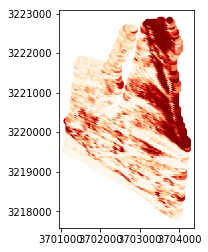

In [21]:
HOGgeo.plot(column='0',cmap='OrRd')
plt.show()

In [22]:
#Distance from anchberth variable

# berth= gpd.read_file(pathshp +'//navfeatures_ACHARE_Point.shp')
# berth.crs ={'init': 'epsg:4326'}

# berth2= gpd.read_file(pathshp +'//navfeatures_ACHARE_Polygon.shp')
# berth2.crs ={'init': 'epsg:4326'}

# berth = berth.append(berth2)

In [23]:
# berth = berth.to_crs({'init': 'epsg:3035'})
# HOGgeo['berth_dis'] = HOGgeo.geometry.apply(lambda g: berth.distance(g).min())

HOGgeo['berth_dis'] = 6000

In [24]:
#Distance from navline valiablle

# navline = gpd.read_file(pathshp +'//navfeatures_NAVLNE_Arc.shp')
# navline.crs ={'init': 'epsg:4326'}

# rectrc= gpd.read_file(pathshp +'//navfeatures_RECTRC_Arc.shp')
# rectrc.crs ={'init': 'epsg:4326'}

# navline = navline.append(rectrc)

# navline= gpd.read_file(pathshp +'//Navfeatures_DWRTCL_Arc.shp')
# navline.crs ={'init': 'epsg:4326'}

In [25]:
# navline = navline.to_crs({'init': 'epsg:3035'})
# HOGgeo['navlin_dis'] = HOGgeo.geometry.apply(lambda g: navline.distance(g).min())

HOGgeo['navlin_dis'] = 6000

In [26]:
HOGgeo['DN'] = 0
HOGgeo['DB'] = 0

In [27]:
HOGgeo.loc[HOGgeo['navlin_dis'] <= 10, 'DN'] = 1
HOGgeo.loc[(HOGgeo['navlin_dis'] > 10) & (HOGgeo['navlin_dis'] <= 100), 'DN'] = 2
HOGgeo.loc[(HOGgeo['navlin_dis'] > 100) & (HOGgeo['navlin_dis'] <= 200), 'DN'] = 3
HOGgeo.loc[(HOGgeo['navlin_dis'] > 200) & (HOGgeo['navlin_dis'] <= 500), 'DN'] = 4
HOGgeo.loc[(HOGgeo['navlin_dis'] > 500) & (HOGgeo['navlin_dis'] <= 1000), 'DN'] = 5
HOGgeo.loc[(HOGgeo['navlin_dis'] > 1000) & (HOGgeo['navlin_dis'] <= 2000), 'DN'] = 6
HOGgeo.loc[(HOGgeo['navlin_dis'] > 2000) & (HOGgeo['navlin_dis'] <= 5000), 'DN'] = 7
HOGgeo.loc[HOGgeo['navlin_dis'] > 5000, 'DN'] = 8


In [28]:
HOGgeo.loc[HOGgeo['berth_dis'] <= 10, 'DB'] = 8
HOGgeo.loc[(HOGgeo['berth_dis'] > 10) & (HOGgeo['berth_dis'] <= 100), 'DB'] = 2
HOGgeo.loc[(HOGgeo['berth_dis'] > 100) & (HOGgeo['berth_dis'] <= 200), 'DB'] = 3
HOGgeo.loc[(HOGgeo['berth_dis'] > 200) & (HOGgeo['berth_dis'] <= 500), 'DB'] = 4
HOGgeo.loc[(HOGgeo['berth_dis'] > 500) & (HOGgeo['berth_dis'] <= 1000), 'DB'] = 5
HOGgeo.loc[(HOGgeo['berth_dis'] > 1000) & (HOGgeo['berth_dis'] <= 2000), 'DB'] = 6
HOGgeo.loc[(HOGgeo['berth_dis'] > 2000) & (HOGgeo['berth_dis'] <= 5000), 'DB'] = 7
HOGgeo.loc[HOGgeo['berth_dis'] > 5000, 'DB'] = 8


In [29]:
HOGgeo.reset_index(drop=True, inplace=True)

In [30]:
HOGgeo['mindep'] = 0

In [31]:
for index, row in HOGgeo.iterrows():
   
    r = int(HOGgeo.loc[index,['R']].values)
    c = int(HOGgeo.loc[index,['C']].values)
    rmin = r*5
    rmax = r*5+5
    cmin = c*5
    cmax = c*5+5
    
    b = array[rmin:rmax,cmin:cmax]
    b = b.astype('float')
    b[np.isnan(b)] = 10000
    HOGgeo.loc[index,['mindep']] = np.min(b)
    print (b)
    
    
    
#     if np.sum(b) == (val*5*5):
#         mindep = -3
#         print ('t')
#     else:
#         b[b == val] = 'nan'
#         mindep = np.nanmin(b)
#         print ('f')
    
#     HOGgeo.loc[index,['mindep']] = mindep

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.46900000e+00
    1.47200000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.44000000e+00
    1.476000

[[ 2.172  2.153  2.13   2.122  2.09 ]
 [ 2.163  2.141  2.138  2.117  2.075]
 [ 2.196  2.19   2.146  2.105  2.065]
 [ 2.214  2.18   2.149  2.137  2.137]
 [ 2.21   2.234  2.237  2.223  2.246]]
[[ 2.056  2.015  1.996  1.933  1.92 ]
 [ 2.034  1.998  1.977  1.951  1.957]
 [ 2.031  2.014  2.002  1.998  1.978]
 [ 2.118  2.113  2.112  2.076  2.055]
 [ 2.243  2.242  2.252  2.241  2.197]]
[[ 1.94   1.947  1.96   1.975  1.995]
 [ 1.96   1.961  1.986  1.996  1.982]
 [ 1.976  2.003  2.007  2.     1.999]
 [ 2.039  2.042  2.05   2.066  2.076]
 [ 2.089  2.066  2.112  2.162  2.172]]
[[ 1.981  1.97   2.001  1.964  1.941]
 [ 1.972  2.001  1.994  1.968  1.943]
 [ 2.011  1.996  2.014  2.025  1.987]
 [ 2.053  2.057  2.043  2.012  1.989]
 [ 2.176  2.125  2.073  2.059  2.036]]
[[ 1.94   1.953  1.978  1.968  1.939]
 [ 1.962  1.974  1.956  1.942  1.945]
 [ 1.964  1.96   1.963  1.992  1.97 ]
 [ 1.99   1.997  1.991  1.985  1.971]
 [ 2.019  2.002  2.025  2.041  2.008]]
[[ 1.944  1.92   1.926  1.909  1.911]
 [ 1.96

 [ 2.378  2.491  2.451  2.414  2.401]]
[[ 2.286  2.266  2.249  2.242  2.266]
 [ 2.31   2.323  2.313  2.321  2.316]
 [ 2.367  2.357  2.346  2.353  2.346]
 [ 2.366  2.347  2.349  2.379  2.339]
 [ 2.405  2.416  2.4    2.359  2.326]]
[[ 2.269  2.306  2.299  2.284  2.277]
 [ 2.336  2.316  2.317  2.319  2.302]
 [ 2.336  2.334  2.3    2.297  2.29 ]
 [ 2.304  2.315  2.306  2.335  2.346]
 [ 2.329  2.35   2.366  2.351  2.343]]
[[ 2.26   2.275  2.293  2.29   2.274]
 [ 2.283  2.275  2.288  2.309  2.325]
 [ 2.303  2.312  2.343  2.333  2.329]
 [ 2.334  2.324  2.331  2.337  2.362]
 [ 2.323  2.346  2.368  2.346  2.351]]
[[ 2.29   2.276  2.234  2.198  2.198]
 [ 2.328  2.324  2.28   2.287  2.279]
 [ 2.334  2.36   2.319  2.317  2.317]
 [ 2.361  2.355  2.334  2.287  2.27 ]
 [ 2.365  2.311  2.297  2.267  2.259]]
[[ 2.214  2.245  2.221  2.17   2.132]
 [ 2.261  2.255  2.26   2.216  2.218]
 [ 2.3    2.249  2.232  2.216  2.211]
 [ 2.267  2.23   2.206  2.166  2.18 ]
 [ 2.207  2.166  2.137  2.142  2.169]]
[[ 2.1

 [ 1.993  1.982  1.962  1.967  1.974]]
[[ 2.083  2.11   2.141  2.155  2.167]
 [ 2.059  2.079  2.118  2.151  2.194]
 [ 2.026  2.056  2.071  2.09   2.115]
 [ 1.985  2.023  2.024  2.053  2.085]
 [ 1.983  1.989  2.021  2.039  2.065]]
[[  2.16100000e+00   2.15400000e+00   2.21900000e+00   1.00000000e+04
    1.00000000e+04]
 [  2.19200000e+00   2.20400000e+00   2.23700000e+00   1.00000000e+04
    1.00000000e+04]
 [  2.15700000e+00   2.20700000e+00   2.24300000e+00   1.00000000e+04
    1.00000000e+04]
 [  2.11300000e+00   2.17100000e+00   2.18500000e+00   2.19000000e+00
    1.00000000e+04]
 [  2.08500000e+00   2.09600000e+00   2.14300000e+00   2.18800000e+00
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.77300000e+00
    1.77200000e+00]
 [  1.00000000e+04   1.00000000e+04   1.77200000e+00   1.77800000e+00
    1.81100000e+00]
 [  1.79500000e+00   1.78700000e+00   1.79700000e+00   1.92300000e+00
    2.07200000e+00]]
[[  1.00000000e+04   1.00000000e+04   1.82300000e+00   1.71200000e+00
    1.73700000e+00]
 [  1.76200000e+00   1.76000000e+00   1.80200000e+00   1.88900000e+00
    1.99000000e+00]
 [  1.77400000e+00   1.82700000e+00   2.02200000e+00   2.10900000e+00
    2.29700000e+00]
 [  1.94700000e+00 

 [ 5.44   5.483  5.514  5.537  5.511]]
[[ 5.195  5.248  5.28   5.287  5.323]
 [ 5.302  5.312  5.369  5.406  5.417]
 [ 5.407  5.424  5.46   5.474  5.468]
 [ 5.493  5.506  5.507  5.52   5.449]
 [ 5.524  5.553  5.508  5.477  5.444]]
[[ 5.388  5.393  5.385  5.362  5.363]
 [ 5.415  5.431  5.41   5.374  5.332]
 [ 5.459  5.419  5.373  5.346  5.291]
 [ 5.415  5.382  5.362  5.342  5.294]
 [ 5.413  5.394  5.392  5.365  5.332]]
[[ 5.34   5.273  5.223  5.187  5.169]
 [ 5.27   5.237  5.206  5.191  5.179]
 [ 5.259  5.234  5.216  5.21   5.193]
 [ 5.28   5.254  5.243  5.213  5.189]
 [ 5.305  5.27   5.254  5.251  5.241]]
[[ 5.154  5.139  5.113  5.101  5.109]
 [ 5.174  5.161  5.144  5.134  5.114]
 [ 5.174  5.16   5.15   5.15   5.14 ]
 [ 5.181  5.193  5.195  5.191  5.168]
 [ 5.244  5.239  5.216  5.208  5.18 ]]
[[ 5.086  5.062  5.057  5.054  5.042]
 [ 5.076  5.07   5.073  5.097  5.106]
 [ 5.1    5.113  5.124  5.149  5.137]
 [ 5.148  5.157  5.156  5.159  5.157]
 [ 5.185  5.192  5.211  5.215  5.229]]
[[ 5.0

[[ 5.965  5.987  5.952  5.897  5.825]
 [ 6.088  6.033  5.949  5.871  5.786]
 [ 6.109  6.036  5.982  5.894  5.813]
 [ 6.124  6.052  5.981  5.924  5.887]
 [ 6.138  6.096  6.04   5.975  5.908]]
[[ 5.714  5.617  5.524  5.449  5.367]
 [ 5.723  5.629  5.538  5.493  5.404]
 [ 5.749  5.663  5.561  5.547  5.479]
 [ 5.81   5.727  5.66   5.588  5.542]
 [ 5.837  5.784  5.745  5.672  5.61 ]]
[[ 5.297  5.201  5.08   4.961  4.826]
 [ 5.309  5.195  5.164  5.137  5.014]
 [ 5.399  5.36   5.285  5.174  5.094]
 [ 5.494  5.436  5.384  5.345  5.279]
 [ 5.548  5.494  5.471  5.417  5.379]]
[[ 4.746  4.686  3.957  3.457  3.175]
 [ 4.898  4.886  4.337  3.539  3.152]
 [ 5.068  4.997  4.821  3.889  3.199]
 [ 5.181  5.089  4.998  4.043  3.268]
 [ 5.368  5.275  5.173  4.521  3.465]]
[[ 2.972  2.854  2.831  2.832  2.801]
 [ 3.005  2.938  2.918  2.865  2.793]
 [ 3.053  3.024  3.024  2.916  2.764]
 [ 3.178  3.142  3.113  2.889  2.587]
 [ 3.422  3.596  3.564  2.878  2.61 ]]
[[ 2.75   2.715  2.694  2.693  2.706]
 [ 2.70

 [ 5.005  5.758  5.958  6.681  6.641]]
[[ 3.29   3.547  3.919  4.283  4.698]
 [ 4.248  5.371  5.172  5.182  6.195]
 [ 5.415  5.587  5.796  6.52   6.869]
 [ 6.015  6.899  7.454  7.358  7.399]
 [ 6.653  6.904  7.284  7.47   7.671]]
[[ 5.225  6.486  6.703  7.179  7.566]
 [ 6.8    6.66   6.809  7.743  8.025]
 [ 7.277  7.465  7.771  8.373  8.446]
 [ 7.474  7.902  8.426  8.625  8.732]
 [ 8.046  8.534  8.867  9.012  8.77 ]]
[[  8.124   8.081   8.319   8.106   8.237]
 [  8.532   8.47    8.309   8.247   8.93 ]
 [  8.604   8.42    8.513   8.995   9.441]
 [  8.751   8.627   8.927   9.435   9.914]
 [  8.766   9.016   9.532   9.851  10.326]]
[[  8.649   9.323   9.814  10.352  10.834]
 [  9.299   9.858  10.263  10.782  11.157]
 [  9.789  10.31   10.708  11.111  11.323]
 [ 10.347  10.746  11.102  11.288  11.393]
 [ 10.729  11.019  11.282  11.388  11.408]]
[[ 11.202  11.319  11.312  11.269  11.23 ]
 [ 11.331  11.347  11.307  11.293  11.231]
 [ 11.371  11.357  11.327  11.289  11.252]
 [ 11.372  11.344 

 [ 10.908  10.719  10.48   10.243  10.   ]]
[[ 11.138  10.921  10.65   10.479  10.283]
 [ 10.748  10.564  10.381  10.119   9.946]
 [ 10.443  10.262  10.022   9.811   9.62 ]
 [ 10.159   9.9     9.669   9.455   9.255]
 [  9.757   9.582   9.347   9.189   9.103]]
[[ 10.072   9.839   9.636   9.431   9.279]
 [  9.739   9.511   9.322   9.165   9.034]
 [  9.385   9.234   9.057   8.947   8.863]
 [  9.109   8.994   8.906   8.846   8.795]
 [  8.99    8.906   8.853   8.802   8.763]]
[[ 9.117  8.986  8.879  8.775  8.7  ]
 [ 8.901  8.806  8.745  8.703  8.676]
 [ 8.802  8.742  8.705  8.676  8.645]
 [ 8.756  8.72   8.681  8.639  8.588]
 [ 8.709  8.663  8.616  8.567  8.544]]
[[ 8.652  8.623  8.608  8.599  8.578]
 [ 8.636  8.594  8.587  8.553  8.506]
 [ 8.607  8.556  8.524  8.482  8.463]
 [ 8.543  8.506  8.493  8.474  8.453]
 [ 8.527  8.495  8.464  8.43   8.363]]
[[ 8.534  8.491  8.455  8.395  8.371]
 [ 8.462  8.423  8.407  8.373  8.34 ]
 [ 8.445  8.413  8.367  8.331  8.287]
 [ 8.402  8.352  8.291  8.26

 [ 8.339  8.299  8.268  8.252  8.243]]
[[ 8.303  8.3    8.272  8.24   8.184]
 [ 8.301  8.266  8.215  8.165  8.104]
 [ 8.244  8.206  8.172  8.131  8.097]
 [ 8.217  8.192  8.148  8.101  8.017]
 [ 8.216  8.155  8.073  8.004  7.969]]
[[  8.11800000e+00   8.09500000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  8.08600000e+00   8.06500000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  8.05300000e+00   8.01500000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  7.95800000e+00   7.94800000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  7.95400000e+00   7.95400000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.74100000e+00]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.69000000e+00]
 [  1.00000000e+04   1.00000000e+04   1.71500000e+00   1.70100000e+00
    1.69100000e+00]
 [  1.73100000e+00   1.70600000e+00   1.71800000e+00   1.77200000e+00
    1.88200000e+00]
 [  1.72400000e+00   1.74900000e+00   1.86000000e+00   1.99200000e+00
    2.11000000e+00]]
[[  1.00000000e+04   1.73200000e+00   1.74000000e+00  

[[ 5.448  5.522  5.722  5.873  6.007]
 [ 5.676  5.83   6.024  6.112  6.251]
 [ 5.957  6.072  6.18   6.305  6.412]
 [ 6.175  6.283  6.394  6.496  6.617]
 [ 6.386  6.493  6.577  6.69   6.802]]
[[ 6.136  6.264  6.351  6.472  6.572]
 [ 6.343  6.415  6.58   6.647  6.707]
 [ 6.518  6.636  6.717  6.767  6.918]
 [ 6.709  6.801  6.865  7.009  7.098]
 [ 6.811  6.948  7.099  7.188  7.337]]
[[ 6.631  6.727  6.891  6.935  7.063]
 [ 6.821  6.943  7.021  7.088  7.266]
 [ 6.999  7.171  7.23   7.374  7.427]
 [ 7.271  7.331  7.457  7.523  7.616]
 [ 7.444  7.543  7.579  7.629  7.796]]
[[ 7.107  7.224  7.369  7.496  7.56 ]
 [ 7.356  7.431  7.562  7.638  7.77 ]
 [ 7.557  7.654  7.702  7.779  7.867]
 [ 7.682  7.755  7.917  7.965  8.137]
 [ 7.868  8.003  8.097  8.195  8.311]]
[[ 7.684  7.725  7.861  7.874  7.93 ]
 [ 7.808  7.877  7.972  8.08   8.186]
 [ 7.988  8.055  8.211  8.284  8.259]
 [ 8.191  8.296  8.407  8.298  8.164]
 [ 8.353  8.513  8.315  8.14   8.027]]
[[ 8.07   8.162  8.215  8.043  7.883]
 [ 8.28

 [ 7.868  7.967  8.037  8.163  8.287]]
[[ 7.556  7.653  7.757  7.899  8.007]
 [ 7.759  7.919  7.962  8.093  8.217]
 [ 8.001  8.097  8.164  8.257  8.403]
 [ 8.14   8.277  8.412  8.503  8.628]
 [ 8.414  8.54   8.634  8.744  8.708]]
[[ 8.095  8.194  8.283  8.4    8.506]
 [ 8.285  8.404  8.491  8.607  8.415]
 [ 8.504  8.619  8.57   8.335  8.223]
 [ 8.633  8.522  8.361  8.261  8.101]
 [ 8.559  8.39   8.191  8.04   7.743]]
[[ 8.438  8.241  8.159  7.977  7.863]
 [ 8.21   8.122  8.017  7.801  7.64 ]
 [ 8.144  7.975  7.72   7.601  7.465]
 [ 7.866  7.639  7.503  7.448  7.4  ]
 [ 7.594  7.473  7.444  7.428  7.399]]
[[ 7.706  7.556  7.473  7.419  7.35 ]
 [ 7.497  7.431  7.373  7.345  7.303]
 [ 7.413  7.358  7.33   7.313  7.292]
 [ 7.369  7.352  7.338  7.32   7.335]
 [ 7.377  7.374  7.366  7.378  7.372]]
[[ 7.326  7.278  7.254  7.246  7.248]
 [ 7.276  7.261  7.262  7.269  7.303]
 [ 7.284  7.291  7.312  7.326  7.341]
 [ 7.345  7.342  7.349  7.372  7.377]
 [ 7.369  7.363  7.393  7.469  7.478]]
[[ 7.2

[[ 8.018  8.204  8.37   8.425  8.55 ]
 [ 8.31   8.431  8.535  8.615  8.71 ]
 [ 8.508  8.627  8.695  8.777  8.907]
 [ 8.684  8.757  8.904  9.025  8.864]
 [ 8.879  9.004  9.002  8.828  8.574]]
[[ 8.602  8.679  8.8    8.781  8.58 ]
 [ 8.775  8.889  8.697  8.55   8.29 ]
 [ 8.89   8.641  8.488  8.186  7.903]
 [ 8.684  8.461  8.072  7.917  7.716]
 [ 8.317  8.002  7.882  7.751  7.702]]
[[ 8.384  8.13   7.866  7.646  7.53 ]
 [ 8.04   7.789  7.615  7.555  7.522]
 [ 7.747  7.606  7.585  7.557  7.519]
 [ 7.651  7.624  7.572  7.53   7.5  ]
 [ 7.645  7.577  7.544  7.521  7.509]]
[[ 7.487  7.459  7.45   7.422  7.415]
 [ 7.501  7.464  7.45   7.432  7.429]
 [ 7.476  7.467  7.455  7.45   7.444]
 [ 7.486  7.476  7.482  7.501  7.534]
 [ 7.505  7.538  7.568  7.575  7.61 ]]
[[ 7.405  7.391  7.399  7.396  7.399]
 [ 7.414  7.398  7.438  7.466  7.518]
 [ 7.473  7.509  7.533  7.566  7.609]
 [ 7.549  7.584  7.612  7.645  7.675]
 [ 7.619  7.665  7.703  7.762  7.813]]
[[ 7.449  7.482  7.514  7.543  7.538]
 [ 7.54

 [ 9.036  9.197  9.287  9.473  9.61 ]]
[[  8.498   8.656   8.81    8.967   9.161]
 [  8.846   9.012   9.152   9.313   9.539]
 [  9.182   9.31    9.454   9.699   9.842]
 [  9.505   9.653   9.878   9.872   9.673]
 [  9.804  10.016   9.795   9.708   9.658]]
[[ 9.342  9.572  9.508  9.38   9.295]
 [ 9.738  9.633  9.487  9.42   9.387]
 [ 9.651  9.521  9.48   9.477  9.476]
 [ 9.597  9.563  9.561  9.577  9.632]
 [ 9.635  9.644  9.687  9.716  9.744]]
[[  9.244   9.284   9.317   9.396   9.544]
 [  9.428   9.455   9.54    9.615   9.715]
 [  9.562   9.611   9.67    9.717   9.757]
 [  9.669   9.743   9.758   9.825   9.963]
 [  9.791   9.83    9.908  10.053  10.301]]
[[  9.596   9.705   9.71    9.831   9.992]
 [  9.743   9.861   9.978  10.085  10.198]
 [  9.877  10.051  10.228  10.373  10.352]
 [ 10.141  10.375  10.278  10.274  10.053]
 [ 10.534  10.401  10.18   10.049   9.789]]
[[ 10.031  10.144  10.013   9.774   9.594]
 [ 10.314  10.091   9.817   9.603   9.367]
 [ 10.107   9.863   9.541   9.406   

 [ 8.279  8.337  8.385  8.485  8.527]]
[[ 7.932  8.042  8.112  8.181  8.277]
 [ 8.151  8.218  8.289  8.347  8.381]
 [ 8.312  8.365  8.425  8.507  8.611]
 [ 8.48   8.517  8.595  8.662  8.739]
 [ 8.625  8.695  8.726  8.781  8.867]]
[[ 8.331  8.35   8.442  8.526  8.585]
 [ 8.484  8.566  8.656  8.721  8.856]
 [ 8.664  8.762  8.813  8.943  9.016]
 [ 8.818  8.919  9.023  9.103  9.275]
 [ 8.989  9.079  9.224  9.449  9.552]]
[[  8.718   8.835   8.895   8.993   9.147]
 [  8.91    8.987   9.176   9.28    9.413]
 [  9.122   9.302   9.444   9.595   9.733]
 [  9.447   9.563   9.766   9.852  10.038]
 [  9.768   9.849  10.039  10.131  10.264]]
[[  9.26    9.476   9.622   9.78   10.012]
 [  9.649   9.822   9.977  10.149   9.99 ]
 [  9.933  10.07   10.161  10.029   9.968]
 [ 10.159  10.151  10.082  10.047  10.037]
 [ 10.222  10.149  10.137  10.131  10.136]]
[[ 10.045   9.856   9.789   9.735   9.727]
 [  9.918   9.852   9.846   9.842   9.84 ]
 [  9.93    9.925   9.939   9.956   9.98 ]
 [ 10.042  10.045 

 [ 8.721  8.793  8.928  9.011  9.162]]
[[ 8.675  8.811  8.961  9.092  9.223]
 [ 8.887  9.033  9.153  9.244  9.37 ]
 [ 9.02   9.153  9.26   9.334  9.426]
 [ 9.139  9.276  9.317  9.396  9.282]
 [ 9.267  9.349  9.397  9.236  9.024]]
[[ 9.351  9.494  9.402  9.112  9.042]
 [ 9.449  9.393  9.035  8.985  8.817]
 [ 9.31   9.102  8.834  8.667  8.64 ]
 [ 9.078  8.898  8.775  8.543  8.524]
 [ 8.891  8.861  8.569  8.353  8.254]]
[[ 8.988  8.837  8.366  8.233  7.999]
 [ 8.73   8.469  8.091  8.055  7.958]
 [ 8.474  8.151  7.855  7.829  7.837]
 [ 8.302  7.931  7.727  7.686  7.553]
 [ 7.901  7.737  7.513  7.431  7.363]]
[[ 8.021  7.988  8.029  8.046  8.098]
 [ 7.808  7.841  7.91   8.049  8.129]
 [ 7.779  7.793  7.822  7.986  8.082]
 [ 7.592  7.647  7.782  7.883  8.047]
 [ 7.358  7.519  7.666  7.774  7.847]]
[[ 8.132  8.181  8.243  8.308  8.324]
 [ 8.214  8.291  8.375  8.422  8.49 ]
 [ 8.162  8.29   8.371  8.46   8.516]
 [ 8.044  8.154  8.193  8.311  8.416]
 [ 7.858  7.962  8.076  8.207  8.4  ]]
[[ 8.4

[[ 8.265  8.4    8.501  8.607  8.705]
 [ 8.394  8.548  8.64   8.75   8.813]
 [ 8.574  8.673  8.726  8.86   8.975]
 [ 8.69   8.796  8.867  9.011  9.092]
 [ 8.785  8.897  8.993  9.06   9.114]]
[[ 8.836  8.922  9.059  9.215  9.261]
 [ 8.968  9.12   9.18   9.247  9.314]
 [ 9.119  9.186  9.255  9.319  9.303]
 [ 9.153  9.196  9.297  9.26   9.162]
 [ 9.193  9.275  9.257  9.171  8.98 ]]
[[ 9.304  9.372  9.191  9.072  8.953]
 [ 9.371  9.215  9.086  8.934  8.76 ]
 [ 9.036  9.01   8.842  8.584  8.559]
 [ 8.985  8.658  8.482  8.443  8.409]
 [ 8.628  8.428  8.375  8.272  8.409]]
[[ 8.823  8.596  8.533  8.181  7.863]
 [ 8.673  8.472  8.299  7.965  7.664]
 [ 8.462  8.38   8.205  7.879  7.57 ]
 [ 8.42   8.284  8.163  7.851  7.556]
 [ 8.3    8.269  8.092  7.828  7.526]]
[[ 7.542  7.409  7.317  7.155  7.244]
 [ 7.348  7.078  6.973  6.99   7.052]
 [ 7.194  6.846  6.834  6.729  6.804]
 [ 7.191  6.872  6.819  6.647  6.694]
 [ 7.218  6.99   6.855  6.777  6.761]]
[[ 7.288  7.29   7.497  7.596  7.715]
 [ 7.14

 [ 7.818  7.661  7.69   7.61   7.597]]
[[ 7.03   7.091  7.159  7.167  7.261]
 [ 7.217  7.251  7.299  7.289  7.361]
 [ 7.366  7.41   7.447  7.507  7.65 ]
 [ 7.545  7.621  7.642  7.725  7.89 ]
 [ 7.713  7.755  7.857  7.98   8.122]]
[[ 7.444  7.735  7.904  8.031  8.067]
 [ 7.624  7.79   7.963  7.971  7.984]
 [ 7.828  7.949  8.027  7.974  7.964]
 [ 8.054  8.117  8.19   8.15   8.008]
 [ 8.277  8.381  8.38   8.356  8.19 ]]
[[ 8.148  8.208  8.327  8.465  8.581]
 [ 8.041  8.066  8.115  8.224  8.356]
 [ 7.99   7.948  7.934  7.95   8.035]
 [ 8.     7.935  7.878  7.836  7.824]
 [ 8.105  7.975  7.904  7.842  7.785]]
[[ 8.782  8.868  8.933  9.113  9.26 ]
 [ 8.513  8.641  8.728  8.851  9.025]
 [ 8.212  8.32   8.489  8.598  8.832]
 [ 7.879  8.017  8.296  8.452  8.754]
 [ 7.873  7.917  8.135  8.369  8.566]]
[[ 9.25   9.251  9.241  9.104  9.138]
 [ 9.105  9.129  9.115  9.089  9.039]
 [ 9.028  9.029  8.995  8.999  9.024]
 [ 8.922  8.856  8.853  8.817  8.827]
 [ 8.778  8.658  8.645  8.604  8.766]]
[[ 9.1

 [ 8.41   8.213  8.206  8.309  8.361]]
[[ 8.625  8.531  8.408  8.39   8.563]
 [ 8.614  8.512  8.311  8.161  8.228]
 [ 8.568  8.645  8.357  8.248  8.223]
 [ 8.483  8.592  8.515  8.455  8.426]
 [ 8.486  8.554  8.621  8.674  8.752]]
[[ 8.783  8.644  8.553  8.488  8.418]
 [ 8.408  8.662  8.539  8.559  8.479]
 [ 8.389  8.655  8.598  8.602  8.655]
 [ 8.546  8.733  8.667  8.717  8.706]
 [ 8.855  8.858  8.804  8.815  8.81 ]]
[[ 8.31   8.27   8.222  8.223  8.437]
 [ 8.423  8.366  8.366  8.469  8.727]
 [ 8.677  8.616  8.605  8.708  8.809]
 [ 8.786  8.779  8.794  8.877  8.991]
 [ 8.817  8.851  8.893  8.959  9.102]]
[[ 8.88   9.03   9.249  9.353  9.356]
 [ 8.968  9.164  9.259  9.28   9.266]
 [ 9.017  9.186  9.27   9.272  9.257]
 [ 9.134  9.247  9.345  9.29   9.244]
 [ 9.294  9.396  9.428  9.31   9.224]]
[[ 9.253  9.202  9.159  9.144  9.052]
 [ 9.221  9.204  9.18   9.17   9.076]
 [ 9.241  9.253  9.21   9.19   9.033]
 [ 9.219  9.172  9.154  9.053  9.06 ]
 [ 9.211  9.174  9.091  9.031  9.033]]
[[ 9.0

[[ 8.591  8.533  8.466  8.526  8.493]
 [ 8.882  8.83   8.8    8.827  8.778]
 [ 9.05   9.099  9.153  9.187  9.078]
 [ 9.184  9.161  9.22   9.324  9.252]
 [ 9.293  9.359  9.417  9.423  9.437]]
[[ 8.545  8.624  8.674  8.809  8.969]
 [ 8.849  8.841  8.914  9.     9.029]
 [ 9.105  9.097  9.134  9.17   9.091]
 [ 9.233  9.298  9.317  9.292  9.232]
 [ 9.434  9.394  9.341  9.3    9.187]]
[[ 8.912  8.957  8.874  8.904  8.923]
 [ 8.904  8.906  8.95   8.983  9.006]
 [ 9.072  9.101  9.149  9.158  9.196]
 [ 9.198  9.198  9.257  9.313  9.337]
 [ 9.055  9.072  9.251  9.405  9.476]]
[[ 8.932  8.984  9.04   9.078  9.292]
 [ 9.07   9.127  9.189  9.208  9.438]
 [ 9.262  9.263  9.349  9.398  9.559]
 [ 9.313  9.4    9.517  9.549  9.758]
 [ 9.501  9.556  9.671  9.761  9.867]]
[[  9.423   9.522   9.445   9.345   9.296]
 [  9.519   9.624   9.624   9.546   9.497]
 [  9.752   9.846   9.767   9.733   9.697]
 [  9.917   9.974   9.944   9.914   9.844]
 [ 10.019  10.049  10.015   9.929   9.852]]
[[ 9.298  9.18   9.0

[[ 9.071  9.093  9.275  9.457  9.537]
 [ 9.281  9.307  9.376  9.53   9.636]
 [ 9.313  9.362  9.498  9.595  9.676]
 [ 9.416  9.413  9.487  9.547  9.613]
 [ 9.4    9.39   9.444  9.533  9.6  ]]
[[ 9.582  9.673  9.759  9.84   9.999]
 [ 9.624  9.691  9.812  9.923  9.96 ]
 [ 9.709  9.733  9.799  9.814  9.812]
 [ 9.698  9.722  9.591  9.605  9.501]
 [ 9.565  9.382  9.353  9.186  9.115]]
[[ 10.035   9.994   9.913   9.825   9.714]
 [  9.926   9.843   9.765   9.635   9.451]
 [  9.737   9.624   9.514   9.365   9.216]
 [  9.422   9.329   9.19    9.036   8.884]
 [  9.056   9.027   8.939   8.838   8.614]]
[[ 9.556  9.331  9.098  8.786  8.248]
 [ 9.33   9.139  8.772  8.413  8.072]
 [ 8.976  8.866  8.478  8.15   7.775]
 [ 8.781  8.564  8.318  7.928  7.5  ]
 [ 8.441  8.213  7.843  7.611  7.458]]
[[ 7.968  7.546  7.307  7.007  6.677]
 [ 7.728  7.549  7.298  6.965  6.688]
 [ 7.526  7.311  7.057  6.804  6.636]
 [ 7.338  7.2    6.973  6.931  6.748]
 [ 7.236  7.271  6.99   6.915  6.869]]
[[ 6.268  5.97   5.5

[[ 7.248  7.238  7.24   7.246  7.259]
 [ 7.17   7.179  7.171  7.189  7.216]
 [ 7.106  7.123  7.137  7.176  7.221]
 [ 7.081  7.115  7.161  7.207  7.285]
 [ 7.086  7.169  7.192  7.221  7.243]]
[[ 7.27   7.28   7.31   7.337  7.385]
 [ 7.262  7.284  7.349  7.393  7.405]
 [ 7.293  7.349  7.371  7.377  7.39 ]
 [ 7.297  7.321  7.328  7.344  7.36 ]
 [ 7.258  7.276  7.297  7.325  7.338]]
[[ 7.417  7.452  7.453  7.451  7.461]
 [ 7.426  7.423  7.429  7.447  7.456]
 [ 7.408  7.424  7.433  7.439  7.464]
 [ 7.383  7.397  7.408  7.412  7.428]
 [ 7.332  7.341  7.354  7.374  7.394]]
[[ 7.478  7.493  7.524  7.551  7.575]
 [ 7.477  7.499  7.539  7.558  7.559]
 [ 7.48   7.504  7.514  7.481  7.496]
 [ 7.455  7.465  7.471  7.479  7.524]
 [ 7.419  7.44   7.476  7.5    7.532]]
[[ 7.604  7.619  7.609  7.621  7.659]
 [ 7.544  7.552  7.59   7.627  7.689]
 [ 7.531  7.573  7.626  7.647  7.656]
 [ 7.566  7.598  7.629  7.632  7.632]
 [ 7.577  7.599  7.594  7.6    7.63 ]]
[[ 7.693  7.721  7.767  7.797  7.815]
 [ 7.71

[[ 7.402  7.436  7.457  7.485  7.499]
 [ 7.404  7.425  7.429  7.449  7.492]
 [ 7.373  7.397  7.402  7.45   7.441]
 [ 7.348  7.341  7.353  7.4    7.403]
 [ 7.286  7.315  7.347  7.41   7.409]]
[[ 7.534  7.545  7.557  7.578  7.608]
 [ 7.502  7.523  7.532  7.555  7.593]
 [ 7.45   7.496  7.533  7.556  7.598]
 [ 7.437  7.491  7.527  7.562  7.6  ]
 [ 7.459  7.519  7.553  7.571  7.584]]
[[ 7.636  7.667  7.686  7.715  7.759]
 [ 7.627  7.654  7.695  7.712  7.754]
 [ 7.629  7.659  7.682  7.711  7.759]
 [ 7.623  7.649  7.684  7.722  7.758]
 [ 7.609  7.655  7.689  7.716  7.743]]
[[ 7.798  7.832  7.869  7.898  7.923]
 [ 7.78   7.818  7.849  7.881  7.899]
 [ 7.785  7.805  7.839  7.855  7.893]
 [ 7.777  7.794  7.825  7.827  7.852]
 [ 7.764  7.728  7.748  7.821  7.887]]
[[ 7.941  7.951  7.99   8.045  8.074]
 [ 7.908  7.969  8.008  8.017  8.065]
 [ 7.906  7.931  7.964  8.032  8.07 ]
 [ 7.881  7.945  7.992  8.03   8.079]
 [ 7.925  7.956  8.009  8.067  8.159]]
[[ 8.101  8.143  8.22   8.264  8.319]
 [ 8.11

[[ 8.499  8.482  8.407  8.313  8.224]
 [ 8.377  8.281  8.211  8.113  7.973]
 [ 8.186  8.108  7.972  7.815  7.679]
 [ 7.946  7.819  7.681  7.481  7.304]
 [ 7.673  7.538  7.342  7.151  6.976]]
[[ 8.106  7.998  7.821  7.667  7.533]
 [ 7.829  7.66   7.48   7.279  7.089]
 [ 7.482  7.266  7.107  6.941  6.736]
 [ 7.116  6.938  6.761  6.557  6.327]
 [ 6.781  6.54   6.347  6.15   5.987]]
[[ 7.261  7.129  6.96   6.716  6.507]
 [ 6.945  6.715  6.499  6.292  6.117]
 [ 6.556  6.253  6.06   5.899  5.764]
 [ 6.088  5.634  5.591  5.571  5.552]
 [ 5.823  5.567  5.198  5.222  5.277]]
[[ 6.33   6.126  5.889  5.383  5.284]
 [ 5.917  5.772  5.664  5.399  5.058]
 [ 5.683  5.532  5.389  5.271  5.061]
 [ 5.441  5.317  5.205  5.07   4.902]
 [ 5.144  4.991  4.988  4.878  4.756]]
[[ 5.402  5.43   5.313  5.193  5.096]
 [ 5.013  5.061  4.955  4.869  4.884]
 [ 4.938  4.839  4.842  4.588  4.476]
 [ 4.644  4.642  4.671  4.563  4.467]
 [ 4.521  4.366  4.474  4.387  4.365]]
[[ 4.876  4.844  4.738  4.822  4.739]
 [ 4.83

[[ 4.502  4.27   4.173  4.169  4.229]
 [ 4.344  4.235  4.175  4.119  4.064]
 [ 4.201  4.118  4.07   4.043  4.06 ]
 [ 4.075  4.027  3.953  3.945  3.96 ]
 [ 3.977  3.887  3.864  3.869  3.898]]
[[ 4.228  4.179  4.119  4.101  4.072]
 [ 4.103  4.091  4.026  4.022  3.982]
 [ 3.972  3.939  3.938  3.947  3.886]
 [ 3.901  3.882  3.878  3.895  3.849]
 [ 3.854  3.846  3.842  3.85   3.796]]
[[ 3.989  3.974  4.004  3.972  3.923]
 [ 3.933  3.929  3.943  3.932  3.872]
 [ 3.873  3.878  3.9    3.884  3.815]
 [ 3.841  3.85   3.848  3.838  3.785]
 [ 3.797  3.817  3.817  3.774  3.75 ]]
[[ 3.896  3.967  3.975  3.975  3.932]
 [ 3.86   3.907  3.929  3.938  3.933]
 [ 3.816  3.878  3.897  3.91   3.894]
 [ 3.793  3.869  3.877  3.872  3.865]
 [ 3.762  3.834  3.844  3.843  3.846]]
[[ 3.947  3.932  3.931  3.915  3.948]
 [ 3.901  3.897  3.892  3.887  3.908]
 [ 3.87   3.877  3.839  3.848  3.857]
 [ 3.841  3.854  3.84   3.837  3.847]
 [ 3.823  3.847  3.811  3.828  3.84 ]]
[[ 3.911  3.936  3.967  3.98   3.977]
 [ 3.88

 [ 3.698  3.708  3.727  3.724  3.755]]
[[ 3.794  3.833  3.801  3.814  3.834]
 [ 3.786  3.821  3.791  3.819  3.819]
 [ 3.763  3.711  3.765  3.802  3.814]
 [ 3.748  3.762  3.76   3.796  3.808]
 [ 3.743  3.792  3.726  3.801  3.822]]
[[ 3.847  3.895  3.906  3.906  3.929]
 [ 3.841  3.885  3.91   3.904  3.941]
 [ 3.841  3.886  3.888  3.9    3.957]
 [ 3.838  3.892  3.909  3.911  3.981]
 [ 3.875  3.902  3.914  3.933  4.022]]
[[ 4.     4.044  4.063  4.095  4.117]
 [ 4.014  4.045  4.106  4.124  4.157]
 [ 4.042  4.065  4.119  4.133  4.189]
 [ 4.046  4.089  4.121  4.138  4.248]
 [ 4.055  4.122  4.14   4.178  4.263]]
[[ 4.192  4.243  4.282  4.411  4.458]
 [ 4.244  4.266  4.338  4.439  4.493]
 [ 4.264  4.3    4.405  4.472  4.518]
 [ 4.279  4.328  4.437  4.474  4.548]
 [ 4.285  4.37   4.452  4.479  4.55 ]]
[[ 4.514  4.546  4.592  4.688  4.75 ]
 [ 4.536  4.554  4.643  4.72   4.794]
 [ 4.557  4.585  4.668  4.728  4.82 ]
 [ 4.552  4.628  4.692  4.74   4.874]
 [ 4.554  4.664  4.706  4.78   4.895]]
[[ 4.8

 [ 6.184  6.349  6.453  6.534  6.62 ]]
[[ 6.698  6.745  6.745  6.76   6.665]
 [ 6.707  6.76   6.706  6.741  6.632]
 [ 6.686  6.711  6.689  6.69   6.578]
 [ 6.666  6.685  6.682  6.614  6.505]
 [ 6.648  6.668  6.676  6.542  6.421]]
[[ 6.582  6.305  5.565  4.747  4.058]
 [ 6.49   6.026  5.245  4.441  3.843]
 [ 6.412  5.716  4.91   4.155  3.573]
 [ 6.232  5.397  4.632  3.928  3.243]
 [ 5.905  5.091  4.339  3.72   3.035]]
[[ 3.416  3.098  2.628  1.952  1.673]
 [ 3.241  2.795  2.471  1.815  1.421]
 [ 2.976  2.353  1.913  1.538  1.269]
 [ 2.766  2.138  1.733  1.449  1.152]
 [ 2.672  2.188  1.822  1.565  1.04 ]]
[[  1.31200000e+00   1.33400000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.28100000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.16700000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.15600000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  9.65000000e-01   1.00000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [    10.886     10.936     11.012     11.028     10.966]]
[[ 10.946  10.782  10.622  10.337  10.07 ]
 [ 10.881  10.688  10.453  10.252  10.011]
 [ 10.813  10.609  10.455  10.245   9.708]
 [ 10.817  10.637  10.245   9.803   9.241]
 [ 10.78   10.273   9.895   9.402   8.928]]
[[ 9.664  9.171  8.787  8.719  8.593]
 [ 9.558  9.061  8.716  8.667  8.492]
 [ 9.263  8.83   8.609  8.594  8.297]
 [ 8.949  8.562  8.517  8.297  8.128]
 [ 8.557  8.35   8.289  8.149  7.954]]
[[ 8.334  8.072  8.1    8.203  8.18 ]
 [ 8.218  8.234  8.385  8.304  8.297]
 [ 8.218  8.281  8.291  8.272  8.343]
 [ 7.963  7.797  7.955  8.335  8.403]
 [ 7.879  7.807  7.888  8.051  8.316]]
[[ 8.066  8.18   8.554  8.778  8.852]
 [ 8.308  8.438  8.7    8.83   9.109]
 [ 8.467  8.571  8.676  9.001  9.195]
 [ 8.433  8.564  8.706  9.198  9.309]
 [ 8.422  8.503  8.902  9.273  9.434]]
[[  9.089   9.387   9.481   9.772   9.989]
 [  9.287   9.498   9.526   9.849  10.046]
 [  9.436   9.586   9.709   9.927  10.07 ]
 [  9.486   9.658   9.7

 [  8.796   8.588   8.407   8.228   8.008]]
[[ 8.402  8.264  8.091  7.884  7.753]
 [ 8.298  8.075  7.884  7.835  7.67 ]
 [ 8.14   7.961  7.845  7.698  7.523]
 [ 8.016  7.895  7.717  7.54   7.468]
 [ 7.826  7.793  7.603  7.505  7.421]]
[[ 7.734  7.781  7.796  7.847  8.239]
 [ 7.666  7.584  7.626  7.768  8.076]
 [ 7.533  7.457  7.439  7.826  7.853]
 [ 7.424  7.378  7.377  7.634  7.828]
 [ 7.364  7.359  7.372  7.457  7.729]]
[[ 8.409  8.436  8.971  9.205  9.382]
 [ 8.061  8.374  8.899  9.245  9.367]
 [ 8.064  8.392  8.879  9.173  9.34 ]
 [ 8.231  8.548  8.884  9.056  9.085]
 [ 8.112  8.489  8.715  8.863  8.908]]
[[ 9.513  9.633  9.749  9.846  9.867]
 [ 9.446  9.524  9.622  9.645  9.67 ]
 [ 9.293  9.325  9.434  9.51   9.559]
 [ 9.124  9.144  9.264  9.286  9.289]
 [ 8.915  8.931  9.039  9.087  8.989]]
[[ 9.833  9.79   9.706  9.554  9.533]
 [ 9.678  9.621  9.528  9.422  9.305]
 [ 9.507  9.352  9.294  9.128  8.861]
 [ 9.205  9.14   8.926  8.673  8.389]
 [ 8.86   8.707  8.489  8.163  7.799]]
[

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   8.85900000e+00
    8.55000000e+00]
 [  1.00000000e+04   9.47400000e+00   9.04200000e+00   8.60400000e+00
    8.33700000e+00]
 [  1.00000000e+04   9.25300000e+00   8.66100000e+00   8.33300000e+00
    8.07700000e+00]
 [  1.00000000e+04   1.00000000e+04   

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   9.81500000e+00
    9.39500000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   9.58300000e+00
    9.06900000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   9.21300000e+00
    8.73500000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   9.13500000e+00
    8.68100000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    8.42400000e+00]]
[[ 8.929  8.507  8.229  8.008  7.911]
 [ 8.641  8.36   8.016  7.837  7.704]
 [ 8.477  8.112  7.795  7.737  7.565]
 [ 8.277  7.948  7.818  7.509  7.401]
 [ 8.035  7.825  7.599  7.407  7.23 ]]
[[ 7.789  7.676  7.643  7.531  7.457]
 [ 7.611  7.54   7.446  7.399  7.31 ]
 [ 7.461  7.324  7.313

 [ 5.529  5.399  5.268  5.173  5.142]]
[[ 5.494  5.382  5.263  5.118  4.937]
 [ 5.319  5.225  5.107  4.972  4.881]
 [ 5.254  5.209  5.089  4.987  4.926]
 [ 5.2    5.191  5.073  4.974  4.926]
 [ 5.204  5.056  4.987  5.016  5.008]]
[[ 4.801  4.705  4.701  4.677  4.652]
 [ 4.783  4.712  4.659  4.603  4.484]
 [ 4.917  4.944  4.903  4.648  4.488]
 [ 4.992  5.019  5.023  5.002  4.992]
 [ 5.152  5.215  5.175  5.191  5.198]]
[[ 4.668  4.671  4.679  4.688  4.666]
 [ 4.491  4.462  4.484  4.517  4.461]
 [ 4.42   4.342  4.328  4.358  4.368]
 [ 4.473  4.267  4.248  4.283  4.289]
 [ 4.609  4.314  4.195  4.209  4.216]]
[[ 4.648  4.56   4.546  4.488  4.521]
 [ 4.453  4.458  4.391  4.381  4.425]
 [ 4.316  4.311  4.262  4.274  4.393]
 [ 4.283  4.242  4.26   4.225  4.365]
 [ 4.225  4.18   4.165  4.318  4.44 ]]
[[ 4.621  4.649  4.656  4.534  4.378]
 [ 4.573  4.601  4.553  4.507  4.294]
 [ 4.56   4.544  4.507  4.506  4.241]
 [ 4.499  4.506  4.483  4.411  4.22 ]
 [ 4.525  4.513  4.478  4.401  4.362]]
[[ 3.9

 [ 3.236  3.159  3.151  3.107  2.974]]
[[ 3.101  2.986  2.966  2.869  2.851]
 [ 3.019  2.937  2.875  2.817  2.829]
 [ 3.004  2.904  2.825  2.8    2.815]
 [ 2.909  2.844  2.792  2.784  2.781]
 [ 2.862  2.834  2.787  2.753  2.734]]
[[ 2.84   2.815  2.802  2.787  2.765]
 [ 2.818  2.794  2.721  2.735  2.77 ]
 [ 2.813  2.783  2.731  2.734  2.744]
 [ 2.775  2.759  2.756  2.744  2.738]
 [ 2.774  2.766  2.726  2.73   2.726]]
[[ 2.704  2.718  2.686  2.669  2.644]
 [ 2.689  2.676  2.662  2.669  2.651]
 [ 2.71   2.652  2.64   2.631  2.632]
 [ 2.709  2.644  2.632  2.633  2.621]
 [ 2.681  2.645  2.623  2.623  2.592]]
[[ 2.645  2.576  2.552  2.509  2.512]
 [ 2.631  2.549  2.537  2.498  2.482]
 [ 2.598  2.541  2.49   2.488  2.465]
 [ 2.571  2.542  2.474  2.474  2.426]
 [ 2.554  2.533  2.462  2.443  2.429]]
[[ 2.458  2.407  2.373  2.334  2.278]
 [ 2.438  2.388  2.358  2.325  2.231]
 [ 2.41   2.36   2.334  2.308  2.242]
 [ 2.392  2.353  2.312  2.275  2.25 ]
 [ 2.406  2.308  2.283  2.271  2.227]]
[[ 2.2

[[ 2.745  2.784  2.751  2.732  2.706]
 [ 2.744  2.782  2.743  2.725  2.666]
 [ 2.734  2.743  2.763  2.699  2.652]
 [ 2.714  2.753  2.74   2.674  2.648]
 [ 2.707  2.747  2.711  2.668  2.621]]
[[ 2.658  2.633  2.593  2.598  2.555]
 [ 2.651  2.632  2.582  2.563  2.557]
 [ 2.627  2.605  2.59   2.554  2.555]
 [ 2.615  2.582  2.57   2.552  2.547]
 [ 2.6    2.599  2.565  2.54   2.539]]
[[ 2.536  2.488  2.432  2.427  2.411]
 [ 2.536  2.465  2.445  2.396  2.388]
 [ 2.514  2.44   2.443  2.383  2.373]
 [ 2.48   2.443  2.428  2.374  2.364]
 [ 2.483  2.452  2.408  2.397  2.367]]
[[ 2.381  2.263  2.25   2.245  2.21 ]
 [ 2.357  2.267  2.245  2.237  2.237]
 [ 2.361  2.285  2.239  2.255  2.24 ]
 [ 2.352  2.332  2.245  2.244  2.202]
 [ 2.356  2.329  2.241  2.213  2.196]]
[[ 2.203  2.15   2.061  2.029  1.941]
 [ 2.148  2.123  2.064  1.987  1.892]
 [ 2.139  2.099  2.052  1.971  1.876]
 [ 2.143  2.105  2.033  1.973  1.905]
 [ 2.179  2.1    2.045  2.006  1.915]]
[[ 1.887  1.883  1.875  1.858  1.806]
 [ 1.83

[[  1.72100000e+00   1.00000000e+04   1.00000000e+04   1.74500000e+00
    1.73600000e+00]
 [  1.69000000e+00   1.85000000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.64000000e+00   1.71900000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.59100000e+00   1.64500000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.56300000e+00   1.58300000e+00   1.60800000e+00   1.00000000e+04
    1.00000000e+04]]
[[  1.76000000e+00   1.77000000e+00   1.77500000e+00   1.81300000e+00
    1.92600000e+00]
 [  1.00000000e+04   1.78400000e+00   1.78300000e+00   1.79600000e+00
    1.81100000e+00]
 [  1.00000000e+04   1.76300000e+00   1.75800000e+00   1.80200000e+00
    1.76200000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.78400000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.73200000e+00]]
[[ 2.124  2.076  1.987  2.017  2.089]
 [ 1.861  1.99   1.977  2.017  2.031]
 [ 1.75   1.893  1.881

[[ 2.396  2.385  2.397  2.388  2.313]
 [ 2.433  2.387  2.404  2.392  2.358]
 [ 2.449  2.413  2.418  2.416  2.431]
 [ 2.457  2.416  2.434  2.426  2.433]
 [ 2.472  2.466  2.443  2.441  2.447]]
[[ 2.305  2.296  2.315  2.253  2.233]
 [ 2.34   2.347  2.337  2.299  2.305]
 [ 2.372  2.378  2.356  2.354  2.346]
 [ 2.412  2.402  2.408  2.424  2.375]
 [ 2.447  2.419  2.445  2.45   2.415]]
[[ 2.212  2.177  2.131  2.027  1.916]
 [ 2.276  2.254  2.217  2.115  2.065]
 [ 2.325  2.323  2.3    2.239  2.157]
 [ 2.383  2.362  2.353  2.317  2.256]
 [ 2.41   2.379  2.379  2.365  2.309]]
[[ 1.819  1.712  1.652  1.599  1.584]
 [ 1.897  1.778  1.718  1.597  1.574]
 [ 2.066  1.938  1.751  1.656  1.56 ]
 [ 2.209  2.104  1.888  1.746  1.581]
 [ 2.305  2.201  2.094  1.855  1.655]]
[[  1.53800000e+00   1.53200000e+00   1.55900000e+00   1.00000000e+04
    1.00000000e+04]
 [  1.54500000e+00   1.49900000e+00   1.51500000e+00   1.00000000e+04
    1.00000000e+04]
 [  1.54400000e+00   1.48700000e+00   1.47300000e+00   1

[[ 2.607  2.598  2.604  2.575  2.545]
 [ 2.589  2.594  2.599  2.565  2.567]
 [ 2.587  2.599  2.595  2.585  2.569]
 [ 2.568  2.586  2.591  2.608  2.566]
 [ 2.577  2.596  2.597  2.605  2.592]]
[[ 2.545  2.521  2.52   2.518  2.505]
 [ 2.541  2.548  2.536  2.526  2.515]
 [ 2.543  2.541  2.543  2.539  2.521]
 [ 2.558  2.541  2.543  2.536  2.535]
 [ 2.576  2.553  2.557  2.544  2.546]]
[[ 2.491  2.494  2.462  2.466  2.46 ]
 [ 2.493  2.496  2.464  2.47   2.505]
 [ 2.51   2.503  2.511  2.503  2.526]
 [ 2.518  2.494  2.512  2.514  2.513]
 [ 2.524  2.501  2.509  2.506  2.508]]
[[ 2.482  2.445  2.452  2.478  2.474]
 [ 2.511  2.47   2.46   2.491  2.495]
 [ 2.515  2.494  2.462  2.484  2.493]
 [ 2.505  2.51   2.471  2.473  2.518]
 [ 2.505  2.506  2.483  2.473  2.51 ]]
[[ 2.423  2.414  2.399  2.391  2.371]
 [ 2.438  2.443  2.404  2.403  2.4  ]
 [ 2.477  2.459  2.413  2.414  2.423]
 [ 2.527  2.478  2.442  2.426  2.427]
 [ 2.537  2.48   2.46   2.443  2.436]]
[[ 2.316  2.303  2.193  2.039  1.82 ]
 [ 2.35

 [ 2.636  2.602  2.56   2.565  2.576]]
[[ 2.498  2.506  2.497  2.486  2.496]
 [ 2.493  2.494  2.512  2.493  2.499]
 [ 2.491  2.514  2.499  2.523  2.5  ]
 [ 2.507  2.528  2.505  2.518  2.502]
 [ 2.542  2.535  2.522  2.518  2.527]]
[[ 2.531  2.475  2.452  2.469  2.458]
 [ 2.526  2.514  2.444  2.46   2.456]
 [ 2.517  2.514  2.455  2.457  2.47 ]
 [ 2.506  2.519  2.515  2.461  2.474]
 [ 2.514  2.535  2.537  2.474  2.47 ]]
[[ 2.442  2.436  2.428  2.398  2.324]
 [ 2.463  2.45   2.437  2.438  2.404]
 [ 2.471  2.461  2.449  2.448  2.439]
 [ 2.503  2.475  2.482  2.459  2.477]
 [ 2.504  2.501  2.489  2.474  2.485]]
[[ 2.275  2.087  1.824  1.692  1.554]
 [ 2.371  2.238  2.086  1.852  1.685]
 [ 2.444  2.357  2.258  2.039  1.852]
 [ 2.455  2.462  2.357  2.267  2.044]
 [ 2.492  2.498  2.421  2.371  2.237]]
[[  1.54000000e+00   1.55600000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.58000000e+00   1.56800000e+00   1.57600000e+00   1.00000000e+04
    1.00000000e+04]
 [  1.68300000e+0

 [ 2.545  2.557  2.596  2.585  2.552]]
[[ 2.512  2.496  2.502  2.455  2.35 ]
 [ 2.536  2.517  2.523  2.498  2.478]
 [ 2.53   2.518  2.527  2.536  2.524]
 [ 2.539  2.556  2.549  2.583  2.569]
 [ 2.54   2.548  2.588  2.619  2.597]]
[[ 2.231  1.986  1.863  1.817  1.736]
 [ 2.347  2.211  2.059  1.923  1.789]
 [ 2.44   2.431  2.265  2.147  1.923]
 [ 2.531  2.495  2.457  2.349  2.205]
 [ 2.59   2.569  2.573  2.514  2.457]]
[[  1.75100000e+00   1.77700000e+00   1.67600000e+00   1.68900000e+00
    1.00000000e+04]
 [  1.75200000e+00   1.67100000e+00   1.63600000e+00   1.63700000e+00
    1.68100000e+00]
 [  1.80300000e+00   1.72800000e+00   1.64000000e+00   1.61700000e+00
    1.55200000e+00]
 [  2.00500000e+00   1.88200000e+00   1.69400000e+00   1.63700000e+00
    1.55600000e+00]
 [  2.30600000e+00   2.16300000e+00   1.95900000e+00   1.73600000e+00
    1.60000000e+00]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   

 [ 2.747  2.729  2.714  2.66   2.677]]
[[ 2.621  2.616  2.557  2.573  2.586]
 [ 2.642  2.634  2.56   2.562  2.58 ]
 [ 2.662  2.644  2.624  2.563  2.584]
 [ 2.674  2.674  2.655  2.58   2.597]
 [ 2.7    2.694  2.641  2.643  2.61 ]]
[[ 2.587  2.569  2.589  2.614  2.57 ]
 [ 2.589  2.571  2.583  2.639  2.603]
 [ 2.599  2.56   2.574  2.612  2.627]
 [ 2.616  2.609  2.576  2.609  2.651]
 [ 2.649  2.628  2.621  2.63   2.657]]
[[ 2.56   2.564  2.611  2.624  2.658]
 [ 2.598  2.613  2.642  2.629  2.657]
 [ 2.612  2.628  2.631  2.64   2.647]
 [ 2.643  2.636  2.636  2.651  2.659]
 [ 2.645  2.639  2.628  2.651  2.686]]
[[ 2.634  2.624  2.632  2.597  2.585]
 [ 2.676  2.687  2.669  2.668  2.651]
 [ 2.696  2.702  2.691  2.7    2.699]
 [ 2.708  2.7    2.705  2.692  2.708]
 [ 2.703  2.694  2.696  2.7    2.716]]
[[ 2.584  2.503  2.361  2.153  1.902]
 [ 2.663  2.642  2.619  2.501  2.428]
 [ 2.688  2.711  2.672  2.633  2.536]
 [ 2.682  2.693  2.674  2.645  2.587]
 [ 2.658  2.651  2.669  2.617  2.585]]
[[  1.

[[ 2.685  2.691  2.666  2.675  2.675]
 [ 2.676  2.68   2.637  2.633  2.632]
 [ 2.661  2.644  2.61   2.583  2.566]
 [ 2.62   2.567  2.555  2.52   2.506]
 [ 2.55   2.475  2.47   2.405  2.391]]
[[ 2.627  2.593  2.618  2.59   2.564]
 [ 2.597  2.541  2.541  2.575  2.548]
 [ 2.559  2.478  2.475  2.515  2.514]
 [ 2.478  2.423  2.415  2.426  2.497]
 [ 2.381  2.341  2.339  2.335  2.439]]
[[ 2.512  2.506  2.503  2.436  2.245]
 [ 2.51   2.455  2.473  2.451  2.308]
 [ 2.498  2.465  2.442  2.449  2.373]
 [ 2.476  2.488  2.423  2.42   2.392]
 [ 2.457  2.435  2.393  2.381  2.333]]
[[  1.83100000e+00   1.71700000e+00   1.67700000e+00   1.00000000e+04
    1.00000000e+04]
 [  2.00700000e+00   1.68600000e+00   1.56600000e+00   1.57100000e+00
    1.00000000e+04]
 [  2.17900000e+00   1.72000000e+00   1.52100000e+00   1.46100000e+00
    1.00000000e+04]
 [  2.23500000e+00   1.95300000e+00   1.51400000e+00   1.36400000e+00
    1.35800000e+00]
 [  2.21100000e+00   2.11600000e+00   1.67700000e+00   1.35200000e+

 [ 2.317  2.324  2.355  2.364  2.375]]
[[ 2.394  2.394  2.357  2.316  2.22 ]
 [ 2.376  2.355  2.313  2.207  2.124]
 [ 2.358  2.312  2.256  2.043  1.855]
 [ 2.366  2.295  2.119  1.769  1.616]
 [ 2.377  2.293  2.048  1.736  1.568]]
[[ 2.122  2.011  1.961  1.454  1.282]
 [ 1.982  1.907  1.9    1.761  1.286]
 [ 1.737  1.707  1.722  1.72   1.489]
 [ 1.528  1.499  1.425  1.393  1.274]
 [ 1.511  1.466  1.385  1.183  1.093]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.27400000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.25400000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.13700000e+00   1.09900000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  9.83000000e-01   9.42000000e-01   1.00000000e+04   1.00000000e+04
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.33900000e+00   1.33600000e+00   1.34800000e+00
    1.39700000e+00]
 [  1.00000000e+04   1.35700000e+00   1.35300000e+00   1.37000000e+00
    1.41300000e+00]
 [  1.00000000e+04   1.37800000e+00   1.36800000e+00   1.36600000e+00
    1.41000000e+00]
 [  1.00000000e+04   1.00000000e+04   1.36300000e+00   1.36200000e+00
    1.38200000e+00]
 [  1.00000000e+04   1.00000000e+04   1.37800000e+00   1.37600000e+00
    1.37300000e+00]]
[[ 1.335  1.313  1.336  1.415  1.529]
 [ 1.366  1.334  1.338  1.401  1.54 ]
 [ 1.416  1.348  1.35   1.411  1.543]
 [ 

[[ 2.739  2.574  2.398  2.208  2.154]
 [ 2.78   2.655  2.508  2.315  2.217]
 [ 2.838  2.751  2.558  2.437  2.249]
 [ 2.868  2.799  2.544  2.464  2.329]
 [ 2.888  2.824  2.589  2.536  2.347]]
[[ 1.764  1.596  1.506  1.488  1.525]
 [ 1.85   1.651  1.608  1.563  1.593]
 [ 1.908  1.737  1.687  1.67   1.668]
 [ 2.107  1.824  1.769  1.781  1.77 ]
 [ 2.307  2.014  1.933  1.89   1.888]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.65500000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.72100000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.79500000e+00   1.89800000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.90300000e+00   1.93300000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  100

[[ 3.132  3.126  3.029  2.998  2.996]
 [ 3.144  3.144  3.098  2.994  2.98 ]
 [ 3.137  3.135  3.089  2.97   2.941]
 [ 3.143  3.142  3.075  3.038  2.917]
 [ 3.138  3.143  3.069  3.042  2.914]]
[[ 2.942  2.846  2.632  2.563  2.557]
 [ 2.956  2.852  2.713  2.608  2.573]
 [ 2.949  2.855  2.773  2.646  2.555]
 [ 2.917  2.861  2.801  2.701  2.535]
 [ 2.88   2.878  2.785  2.703  2.563]]
[[ 2.428  2.274  2.038  1.964  1.965]
 [ 2.515  2.232  2.084  1.981  1.949]
 [ 2.557  2.277  2.111  2.032  2.012]
 [ 2.523  2.334  2.112  2.035  1.951]
 [ 2.442  2.432  2.095  2.044  1.958]]
[[ 1.971  1.865  1.861  1.505  1.455]
 [ 1.987  1.845  1.601  1.525  1.511]
 [ 1.964  1.809  1.625  1.561  1.565]
 [ 1.949  1.832  1.72   1.614  1.605]
 [ 1.942  1.956  1.844  1.708  1.667]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.59200000e+00   1.00000000e+04   1.00000000e+04   1

 [ 3.133  3.132  3.099  3.071  2.987]]
[[ 2.874  2.87   2.789  2.693  2.578]
 [ 2.884  2.827  2.807  2.684  2.609]
 [ 2.916  2.832  2.793  2.679  2.653]
 [ 2.95   2.805  2.743  2.691  2.659]
 [ 2.914  2.812  2.747  2.696  2.684]]
[[ 2.438  2.449  2.123  2.092  2.04 ]
 [ 2.486  2.484  2.221  2.175  2.158]
 [ 2.603  2.541  2.436  2.256  2.236]
 [ 2.651  2.623  2.54   2.406  2.301]
 [ 2.656  2.637  2.507  2.439  2.361]]
[[ 2.018  2.073  2.099  1.944  1.696]
 [ 2.109  2.131  2.035  1.868  1.726]
 [ 2.213  2.143  2.01   1.848  1.792]
 [ 2.229  2.127  1.99   1.83   1.812]
 [ 2.245  2.131  2.029  1.864  1.816]]
[[ 1.695  1.757  1.83   1.774  1.752]
 [ 1.705  1.749  1.821  1.82   1.851]
 [ 1.755  1.755  1.82   1.859  1.898]
 [ 1.758  1.755  1.784  1.876  1.914]
 [ 1.789  1.767  1.784  1.913  1.949]]
[[  1.76000000e+00   1.72200000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.80500000e+00   1.62100000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.73600000e+0

[[ 1.839  1.829  1.823  1.94   1.976]
 [ 1.916  1.933  1.924  1.986  2.022]
 [ 2.03   2.044  2.     2.026  2.079]
 [ 2.151  2.124  2.133  2.103  2.176]
 [ 2.246  2.213  2.237  2.265  2.266]]
[[  1.97400000e+00   1.65100000e+00   1.50800000e+00   1.51400000e+00
    1.00000000e+04]
 [  2.13900000e+00   1.84200000e+00   1.50100000e+00   1.48400000e+00
    1.00000000e+04]
 [  2.21700000e+00   1.89000000e+00   1.55800000e+00   1.48600000e+00
    1.00000000e+04]
 [  2.32800000e+00   2.03700000e+00   1.59500000e+00   1.48900000e+00
    1.50800000e+00]
 [  2.41800000e+00   2.41400000e+00   1.71900000e+00   1.51000000e+00
    1.50800000e+00]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.55900000e+00
    1.56300000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.60300000e+00
    1.59900000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.61800000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.62800000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.64600000e+00]]
[[ 1.656  1.793  1.869  1.859  1.875]
 [ 1.693  1.831  1.878  1.85   1.884]
 [ 1.696  1.826  1.871  1.874  1.884]
 [ 1.694  1.805  1.894  1.917  1.892]
 [ 1.703  1.799  1.902  1.939  1.941]]
[[ 1.941  2.002  2.046  2.037  2.057]
 [ 1.923  2.013  2.035  2.033  2.053]
 [ 1.936  2.021  2.044  2.066  2.066]
 [ 1.947  2.01   2.045  2.08

    1.00000000e+04]]
[[ 1.693  1.791  1.892  1.93   1.938]
 [ 1.694  1.787  1.893  1.941  1.968]
 [ 1.687  1.77   1.884  1.949  1.964]
 [ 1.654  1.751  1.848  1.935  1.962]
 [ 1.661  1.716  1.81   1.913  1.952]]
[[ 1.952  1.977  2.057  2.118  2.119]
 [ 1.95   1.967  2.052  2.127  2.138]
 [ 1.958  1.983  2.048  2.112  2.17 ]
 [ 1.965  1.993  2.038  2.094  2.159]
 [ 1.98   1.991  2.02   2.086  2.155]]
[[ 2.104  2.18   2.206  2.209  2.208]
 [ 2.142  2.208  2.201  2.234  2.223]
 [ 2.176  2.199  2.197  2.23   2.226]
 [ 2.181  2.177  2.213  2.219  2.244]
 [ 2.157  2.153  2.214  2.228  2.259]]
[[ 2.279  2.307  2.316  2.348  2.362]
 [ 2.288  2.318  2.345  2.366  2.393]
 [ 2.294  2.323  2.36   2.4    2.42 ]
 [ 2.255  2.322  2.387  2.414  2.429]
 [ 2.26   2.33   2.411  2.397  2.44 ]]
[[ 2.369  2.35   2.421  2.429  2.464]
 [ 2.39   2.374  2.414  2.444  2.469]
 [ 2.413  2.397  2.426  2.481  2.482]
 [ 2.441  2.44   2.456  2.5    2.486]
 [ 2.462  2.47   2.467  2.5    2.493]]
[[ 2.478  2.492  2.501  

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.65400000e+00   1.69800000e+00   1.76900000e+00   1.89300000e+00
    1.94600000e+00]
 [  1.65900000e+00   1.67500000e+00   1.77500000e+00   1.88200000e+00
    1.94500000e+00]
 [  1.00000000e+04   1.70000000e+00   1.76700000e+00   1.86300000e+00
    1.95400000e+00]
 [  1.00000000e+04   1.72200000e+00   1.73900000e+00   1.82700000e+00
    1.95800000e+00]
 [  1.00000000e+04   1.72300000e+00   1.71500000e+00   1.81200000e+00
    1.95400000e+00]]
[[ 2.005  2.     2.002  2.059  2.162]
 [ 2.013  1.992  2.001  2.047  2.166]
 [ 2.003  1.974  2.012  2.053  2.105]
 [ 1.985  1.982  2.005  2.039  2.103]
 [ 1.978  2.005  2.017  2.033  2.087]]
[[ 2.16   2.156  2.216  2.249  2.286]
 [ 2.155  2.159  2.225  2.277  2.305]
 [ 2.201  2.202  2.235  2.303  2.329]
 [ 2.198  2.233  2.24   2.30

[[  1.00000000e+04   1.70600000e+00   1.69200000e+00   1.80100000e+00
    1.92300000e+00]
 [  1.00000000e+04   1.00000000e+04   1.69300000e+00   1.78100000e+00
    1.87700000e+00]
 [  1.00000000e+04   1.00000000e+04   1.69200000e+00   1.76000000e+00
    1.85400000e+00]
 [  1.00000000e+04   1.00000000e+04   1.68600000e+00   1.73000000e+00
    1.80500000e+00]
 [  1.00000000e+04   1.00000000e+04   1.68100000e+00   1.69200000e+00
    1.77100000e+00]]
[[ 1.982  2.007  2.044  2.059  2.114]
 [ 1.971  2.025  2.054  2.063  2.129]
 [ 1.966  2.027  2.063  2.073  2.127]
 [ 1.942  2.023  2.086  2.089  2.127]
 [ 1.922  2.002  2.062  2.099  2.132]]
[[ 2.219  2.274  2.294  2.328  2.361]
 [ 2.223  2.27   2.31   2.331  2.369]
 [ 2.245  2.259  2.339  2.363  2.383]
 [ 2.251  2.273  2.329  2.379  2.418]
 [ 2.221  2.29   2.331  2.384  2.388]]
[[ 2.387  2.391  2.44   2.443  2.495]
 [ 2.39   2.408  2.417  2.45   2.484]
 [ 2.378  2.43   2.428  2.466  2.487]
 [ 2.409  2.441  2.44   2.496  2.509]
 [ 2.409  2.43 

[[ 1.864  2.007  2.067  2.125  2.145]
 [ 1.799  2.001  2.079  2.144  2.148]
 [ 1.762  1.928  2.073  2.172  2.174]
 [ 1.753  1.906  2.044  2.167  2.193]
 [ 1.731  1.881  2.041  2.172  2.22 ]]
[[ 2.198  2.299  2.331  2.378  2.389]
 [ 2.197  2.289  2.321  2.36   2.392]
 [ 2.196  2.31   2.333  2.363  2.406]
 [ 2.201  2.284  2.345  2.37   2.418]
 [ 2.227  2.296  2.363  2.376  2.423]]
[[ 2.413  2.414  2.446  2.454  2.51 ]
 [ 2.428  2.425  2.472  2.48   2.522]
 [ 2.425  2.444  2.486  2.483  2.507]
 [ 2.435  2.475  2.495  2.508  2.517]
 [ 2.412  2.474  2.49   2.517  2.523]]
[[ 2.544  2.574  2.557  2.592  2.612]
 [ 2.543  2.603  2.59   2.589  2.597]
 [ 2.553  2.607  2.598  2.576  2.609]
 [ 2.549  2.587  2.629  2.614  2.648]
 [ 2.569  2.568  2.609  2.625  2.629]]
[[ 2.627  2.66   2.691  2.683  2.756]
 [ 2.637  2.655  2.699  2.694  2.745]
 [ 2.626  2.658  2.694  2.703  2.728]
 [ 2.656  2.675  2.68   2.712  2.718]
 [ 2.656  2.667  2.678  2.732  2.727]]
[[ 2.763  2.782  2.78   2.844  2.855]
 [ 2.76

[[ 2.879  2.877  2.947  2.972  2.988]
 [ 2.89   2.877  2.891  2.957  2.982]
 [ 2.919  2.906  2.938  3.     3.011]
 [ 2.898  2.927  2.958  3.014  3.016]
 [ 2.889  2.96   2.968  3.056  3.055]]
[[ 3.055  3.094  3.095  3.108  3.142]
 [ 3.054  3.082  3.126  3.125  3.141]
 [ 3.032  3.02   3.054  3.133  3.147]
 [ 3.042  3.036  3.046  3.1    3.128]
 [ 3.047  3.075  3.074  3.093  3.137]]
[[ 3.194  3.239  3.247  3.306  3.411]
 [ 3.184  3.223  3.292  3.321  3.407]
 [ 3.167  3.217  3.302  3.343  3.371]
 [ 3.145  3.217  3.304  3.359  3.37 ]
 [ 3.142  3.203  3.267  3.319  3.396]]
[[ 3.488  3.565  3.591  3.678  3.757]
 [ 3.472  3.554  3.615  3.715  3.766]
 [ 3.427  3.504  3.597  3.71   3.773]
 [ 3.423  3.513  3.584  3.674  3.748]
 [ 3.434  3.503  3.565  3.689  3.744]]
[[ 3.782  3.853  3.898  3.941  4.008]
 [ 3.817  3.915  3.892  3.941  3.99 ]
 [ 3.841  3.91   3.911  3.948  3.987]
 [ 3.82   3.875  3.892  3.925  3.977]
 [ 3.765  3.798  3.87   3.898  3.983]]
[[ 4.076  4.108  4.204  4.174  4.189]
 [ 4.08

[[ 4.164  4.185  4.202  4.243  4.27 ]
 [ 4.142  4.171  4.175  4.236  4.241]
 [ 4.123  4.145  4.156  4.219  4.23 ]
 [ 4.093  4.123  4.135  4.19   4.226]
 [ 4.082  4.104  4.145  4.177  4.209]]
[[ 4.301  4.352  4.371  4.434  4.455]
 [ 4.31   4.328  4.369  4.408  4.473]
 [ 4.303  4.315  4.359  4.4    4.467]
 [ 4.284  4.284  4.35   4.371  4.482]
 [ 4.254  4.266  4.334  4.372  4.487]]
[[ 4.555  4.594  4.73   4.824  4.918]
 [ 4.548  4.607  4.741  4.846  4.976]
 [ 4.547  4.652  4.755  4.872  5.006]
 [ 4.552  4.687  4.753  4.869  5.023]
 [ 4.555  4.692  4.783  4.882  5.068]]
[[ 5.104  5.246  5.464  5.704  5.99 ]
 [ 5.133  5.306  5.506  5.779  6.04 ]
 [ 5.141  5.372  5.556  5.859  6.128]
 [ 5.188  5.385  5.64   5.953  6.194]
 [ 5.25   5.5    5.742  6.019  6.293]]
[[ 6.268  6.575  6.908  7.26   7.561]
 [ 6.346  6.621  7.014  7.367  7.72 ]
 [ 6.424  6.705  7.16   7.505  7.85 ]
 [ 6.515  6.864  7.279  7.627  7.981]
 [ 6.602  6.983  7.381  7.706  8.134]]
[[ 7.947  8.261  8.576  8.763  8.84 ]
 [ 8.07

 [ 8.978  9.166  9.231  9.257  9.293]]
[[ 9.192  9.152  9.142  9.06   9.04 ]
 [ 9.2    9.172  9.144  9.071  9.061]
 [ 9.212  9.192  9.158  9.105  9.088]
 [ 9.229  9.202  9.183  9.11   9.102]
 [ 9.239  9.22   9.214  9.15   9.133]]
[[ 9.009  8.925  8.862  8.818  8.693]
 [ 9.005  8.953  8.872  8.866  8.183]
 [ 9.033  8.97   8.901  8.86   8.172]
 [ 9.064  8.976  8.971  8.338  8.24 ]
 [ 9.117  9.048  9.066  8.314  8.311]]
[[ 8.053  8.053  7.761  7.454  6.779]
 [ 8.094  7.83   7.683  7.489  6.729]
 [ 8.165  7.854  7.574  7.529  6.657]
 [ 7.994  7.843  7.602  7.523  6.6  ]
 [ 8.014  7.691  7.671  7.661  6.494]]
[[ 5.605  4.684  3.82   3.23   2.716]
 [ 5.686  4.642  3.79   3.242  2.692]
 [ 5.62   4.576  3.7    3.23   2.702]
 [ 5.545  4.614  3.709  3.197  2.631]
 [ 5.437  4.651  3.704  3.139  2.56 ]]
[[  2.41700000e+00   2.17200000e+00   1.93200000e+00   1.78200000e+00
    1.76600000e+00]
 [  2.37800000e+00   2.12500000e+00   1.91600000e+00   1.78200000e+00
    1.77500000e+00]
 [  2.35200000e+0

[[ 7.971  7.741  7.711  7.52   6.418]
 [ 7.856  7.83   7.75   7.378  6.297]
 [ 7.923  7.779  7.694  7.297  6.216]
 [ 8.025  7.813  7.542  7.144  6.084]
 [ 7.869  7.703  7.44   7.043  6.048]]
[[ 5.343  4.531  3.689  3.094  2.493]
 [ 5.278  4.484  3.618  3.005  2.431]
 [ 5.223  4.398  3.596  3.014  2.382]
 [ 5.14   4.306  3.617  3.003  2.347]
 [ 5.072  4.288  3.583  2.996  2.331]]
[[  2.23700000e+00   2.04500000e+00   1.92600000e+00   1.86000000e+00
    1.00000000e+04]
 [  2.22200000e+00   2.05100000e+00   1.95100000e+00   1.86200000e+00
    1.00000000e+04]
 [  2.20000000e+00   1.97800000e+00   1.95800000e+00   1.87300000e+00
    1.00000000e+04]
 [  2.16200000e+00   1.95300000e+00   1.90400000e+00   1.84700000e+00
    1.00000000e+04]
 [  2.15100000e+00   1.96100000e+00   1.86400000e+00   1.80500000e+00
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  100

[[ 7.888  7.523  7.431  6.967  5.955]
 [ 7.738  7.472  7.336  6.844  5.836]
 [ 7.582  7.515  7.339  6.761  5.765]
 [ 7.565  7.464  7.291  6.639  5.702]
 [ 7.539  7.508  7.048  6.497  5.62 ]]
[[ 4.971  4.235  3.585  3.043  2.343]
 [ 4.943  4.168  3.478  3.004  2.347]
 [ 4.87   4.103  3.435  2.94   2.365]
 [ 4.788  4.028  3.404  2.899  2.357]
 [ 4.7    3.96   3.41   2.867  2.315]]
[[  2.09700000e+00   1.89900000e+00   1.83700000e+00   1.78500000e+00
    1.00000000e+04]
 [  2.02900000e+00   1.83400000e+00   1.80600000e+00   1.77200000e+00
    1.00000000e+04]
 [  1.98500000e+00   1.82400000e+00   1.78100000e+00   1.76100000e+00
    1.00000000e+04]
 [  1.97900000e+00   1.82900000e+00   1.73500000e+00   1.73400000e+00
    1.00000000e+04]
 [  1.96500000e+00   1.78400000e+00   1.71000000e+00   1.68400000e+00
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  100

 [ 8.54   7.951  7.848  7.413  7.256]]
[[ 7.546  7.172  7.014  6.39   5.453]
 [ 7.461  7.062  7.013  6.212  5.327]
 [ 7.198  7.08   6.919  6.095  5.244]
 [ 7.186  7.065  6.78   6.011  5.157]
 [ 7.206  7.086  6.616  5.946  5.124]]
[[ 4.647  3.867  3.411  2.885  2.306]
 [ 4.502  3.811  3.488  2.865  2.306]
 [ 4.461  3.828  3.518  2.849  2.314]
 [ 4.393  3.897  3.533  2.801  2.291]
 [ 4.466  4.209  3.685  2.912  2.204]]
[[  1.97900000e+00   1.77000000e+00   1.69400000e+00   1.67600000e+00
    1.00000000e+04]
 [  2.00700000e+00   1.78900000e+00   1.64400000e+00   1.63100000e+00
    1.00000000e+04]
 [  2.00700000e+00   1.73800000e+00   1.64300000e+00   1.62300000e+00
    1.00000000e+04]
 [  2.00800000e+00   1.78500000e+00   1.66600000e+00   1.64700000e+00
    1.00000000e+04]
 [  2.01400000e+00   1.83100000e+00   1.65900000e+00   1.64800000e+00
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]

    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 1000

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

 [ 10000.  10000.  10000.  10000.  10000.]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.90500000e+00
    1.88300000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.87900000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.87900000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.86600000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]]
[[ 1.879  1.883  1.896  1.935  1.927]
 [ 1.857  1.876  1.863  1.891  1.93 ]
 [ 1.863  1.857  1.857  1.875  1.91 ]
 [ 1.85   1.849  1.873  1.862  1.888]
 [ 1.844  1.853  1.859  1.868  1.867]]
[[ 1.922  1.951  1.973  2.003  2.02 ]
 [ 1.919  1.921  1.968  1.993  2.022]
 [ 1.931  1.921  1.945  1.998  2.027]
 [ 1.935  1.932  1.926  1.953  2.002]
 [ 1.9    1.94   1.921  1.929  1.969]]
[[ 2.022  2.027  2.041  2.06   2.035]
 [ 2.033  2.004  2.019  2.012  1.996]
 [ 2.006  1.984  1.993  1.979  1.974]
 [ 1.981 

[[ 1.993  2.07   2.077  2.078  2.112]
 [ 1.998  2.032  2.024  2.028  2.063]
 [ 1.993  1.993  1.994  1.991  2.064]
 [ 1.989  1.953  1.956  1.986  2.051]
 [ 1.965  1.947  1.938  1.99   2.012]]
[[ 2.155  2.138  2.081  1.925  1.61 ]
 [ 2.107  2.129  2.094  1.944  1.674]
 [ 2.091  2.137  2.141  1.971  1.732]
 [ 2.082  2.145  2.143  2.045  1.823]
 [ 2.098  2.178  2.188  2.096  1.943]]
[[  1.49700000e+00   1.49000000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.46500000e+00   1.45100000e+00   1.47400000e+00   1.00000000e+04
    1.00000000e+04]
 [  1.47800000e+00   1.41000000e+00   1.43900000e+00   1.00000000e+04
    1.00000000e+04]
 [  1.53400000e+00   1.39600000e+00   1.40200000e+00   1.38500000e+00
    1.00000000e+04]
 [  1.66000000e+00   1.42800000e+00   1.38100000e+00   1.36400000e+00
    1.39300000e+00]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  100

[[ 1.938  1.905  1.93   2.005  2.026]
 [ 1.942  1.89   1.896  1.992  2.032]
 [ 1.946  1.899  1.894  1.974  2.021]
 [ 1.93   1.892  1.887  1.892  2.006]
 [ 1.901  1.917  1.864  1.888  1.976]]
[[ 2.089  2.188  2.159  2.159  2.026]
 [ 2.065  2.165  2.173  2.147  2.131]
 [ 2.061  2.165  2.19   2.126  2.21 ]
 [ 2.059  2.13   2.197  2.151  2.189]
 [ 2.017  2.112  2.178  2.228  2.243]]
[[ 1.727  1.463  1.375  1.362  1.35 ]
 [ 1.933  1.546  1.412  1.329  1.317]
 [ 2.069  1.67   1.459  1.327  1.276]
 [ 2.209  1.715  1.468  1.327  1.245]
 [ 2.211  1.782  1.514  1.37   1.24 ]]
[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.29600000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.25900000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.22800000e+00   1.22800000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.20300000e+00   1.20000000e+00   1.00000000e+04   1.00000000e+

[[  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.91500000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.94900000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.96400000e+00]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]]
[[ 1.768  1.726  1.669  1.674  1.686]
 [ 1.781  1.736  1.669  1.672  1.672]
 [ 1.825  1.731  1.67   1.657  1.665]
 [ 1.85   1.762  1.694  1.652  1.644]
 [ 1.866  1.726  1.711  1.64   1.618]]
[[ 1.688  1.759  1.821  1.897  1.971]
 [ 1.659  1.734  1.827  1.912  1.943]
 [ 1.662  1.701  1.833  1.883  1.905]
 [ 1.653  1.662  1.802  1.826  1.853]
 [ 1.641  1.657  1.722  1.767  1.807]]
[[ 2.001  2.054  2.184  2.362  2.657]
 [ 1.975  2.059  2.167  2.339  2.559]
 [ 1.935  2.054  2.167  2.339  2.523]
 [ 1.92   2.041  2.155  2.399  2.549]
 [ 1.933  2.03 

[[  1.89600000e+00   1.75300000e+00   1.72400000e+00   1.65700000e+00
    1.64500000e+00]
 [  1.91900000e+00   1.81600000e+00   1.75600000e+00   1.67500000e+00
    1.66200000e+00]
 [  1.90500000e+00   1.80000000e+00   1.75000000e+00   1.68200000e+00
    1.67200000e+00]
 [  1.00000000e+04   1.78600000e+00   1.72400000e+00   1.69600000e+00
    1.66800000e+00]
 [  1.00000000e+04   1.79100000e+00   1.73000000e+00   1.73700000e+00
    1.69300000e+00]]
[[ 1.646  1.633  1.693  1.7    1.751]
 [ 1.693  1.657  1.677  1.69   1.713]
 [ 1.649  1.7    1.694  1.693  1.681]
 [ 1.641  1.679  1.654  1.725  1.731]
 [ 1.687  1.681  1.666  1.717  1.831]]
[[ 1.922  2.045  2.204  2.312  2.602]
 [ 1.873  2.045  2.2    2.328  2.472]
 [ 1.863  2.026  2.173  2.391  2.47 ]
 [ 1.89   2.027  2.2    2.416  2.476]
 [ 1.903  2.05   2.255  2.359  2.392]]
[[ 2.427  2.312  2.226  2.173  2.11 ]
 [ 2.376  2.287  2.226  2.169  2.114]
 [ 2.364  2.279  2.228  2.134  2.125]
 [ 2.339  2.193  2.168  2.121  2.135]
 [ 2.334  2.193

[[  6.125   7.147   8.225   9.754  10.295]
 [  6.479   7.551   8.745  10.087  10.753]
 [  6.803   7.998   9.333  10.404  10.895]
 [  7.286   8.556   9.816  10.623  10.879]
 [  7.764   9.131  10.213  10.586  10.88 ]]
[[ 10.978  11.433  11.594  11.587  11.56 ]
 [ 11.092  11.461  11.543  11.479  11.396]
 [ 11.105  11.472  11.41   11.349  11.222]
 [ 11.169  11.351  11.263  11.16   11.006]
 [ 11.124  11.175  11.079  10.987  10.813]]
[[ 11.419  11.158  10.843  10.512  10.214]
 [ 11.227  10.885  10.564  10.297  10.011]
 [ 10.988  10.62   10.327  10.086   9.855]
 [ 10.721  10.411  10.145   9.957   9.709]
 [ 10.513  10.229  10.03    9.83    9.572]]
[[ 9.912  9.681  9.422  9.179  9.013]
 [ 9.765  9.554  9.296  9.073  8.928]
 [ 9.633  9.439  9.174  8.976  8.839]
 [ 9.498  9.289  9.023  8.886  8.779]
 [ 9.368  9.142  8.93   8.817  8.706]]
[[ 8.902  8.78   8.69   8.617  8.53 ]
 [ 8.803  8.714  8.637  8.548  8.436]
 [ 8.747  8.625  8.573  8.476  8.331]
 [ 8.656  8.561  8.514  8.406  8.265]
 [ 8.565 

[[ 10.834  10.919  10.886  10.816  10.627]
 [ 10.508  10.58   10.641  10.665  10.458]
 [ 10.189  10.349  10.472  10.582  10.366]
 [ 10.111  10.321  10.461  10.454  10.236]
 [ 10.213  10.443  10.531  10.318  10.057]]
[[ 10.349  10.126   9.938   9.697   9.455]
 [ 10.251  10.029   9.802   9.545   9.286]
 [ 10.127   9.91    9.654   9.358   9.133]
 [ 10.006   9.758   9.457   9.185   9.022]
 [  9.794   9.56    9.285   9.068   8.931]]
[[ 9.23   9.007  8.852  8.743  8.638]
 [ 9.069  8.894  8.763  8.681  8.574]
 [ 8.932  8.791  8.696  8.602  8.502]
 [ 8.858  8.723  8.611  8.523  8.405]
 [ 8.759  8.624  8.563  8.436  8.324]]
[[ 8.523  8.456  8.317  8.221  8.031]
 [ 8.468  8.369  8.23   8.082  7.906]
 [ 8.404  8.244  8.139  7.932  7.796]
 [ 8.297  8.159  7.979  7.807  7.652]
 [ 8.193  8.045  7.828  7.699  7.569]]
[[ 7.858  7.676  7.536  7.345  7.133]
 [ 7.725  7.566  7.433  7.185  7.023]
 [ 7.608  7.47   7.304  7.055  6.864]
 [ 7.521  7.398  7.145  6.96   6.663]
 [ 7.408  7.251  7.014  6.793  6.5

[[ 9.626  9.355  9.154  8.994  8.828]
 [ 9.42   9.219  9.013  8.918  8.742]
 [ 9.29   9.12   8.943  8.827  8.655]
 [ 9.219  9.022  8.864  8.748  8.573]
 [ 9.122  8.935  8.784  8.64   8.472]]
[[ 8.702  8.59   8.483  8.337  8.211]
 [ 8.594  8.514  8.39   8.219  8.118]
 [ 8.539  8.415  8.259  8.135  8.002]
 [ 8.442  8.298  8.174  8.047  7.88 ]
 [ 8.325  8.179  8.081  7.927  7.744]]
[[ 8.099  7.897  7.696  7.593  7.454]
 [ 7.975  7.777  7.617  7.489  7.362]
 [ 7.838  7.661  7.518  7.394  7.27 ]
 [ 7.716  7.57   7.403  7.283  7.126]
 [ 7.59   7.457  7.297  7.175  7.005]]
[[ 7.314  7.109  6.886  6.623  6.33 ]
 [ 7.188  6.932  6.751  6.492  6.212]
 [ 7.061  6.804  6.634  6.36   6.07 ]
 [ 6.899  6.649  6.474  6.179  5.935]
 [ 6.758  6.553  6.335  6.016  5.758]]
[[ 6.04   5.694  5.471  5.056  4.6  ]
 [ 5.909  5.582  5.333  4.924  4.406]
 [ 5.763  5.455  5.127  4.698  4.167]
 [ 5.579  5.417  5.036  4.562  3.917]
 [ 5.507  5.29   4.901  4.393  3.752]]
[[ 3.761  3.35   3.206  3.054  2.8  ]
 [ 3.64

 [ 6.103  5.837  5.615  5.377  5.179]]
[[ 5.365  5.096  4.691  4.268  3.666]
 [ 5.292  4.976  4.53   4.047  3.576]
 [ 5.181  4.898  4.356  3.956  3.489]
 [ 4.995  4.585  4.233  3.807  3.409]
 [ 4.84   4.447  4.073  3.663  3.336]]
[[ 3.36   3.227  3.053  2.91   2.755]
 [ 3.288  3.174  3.019  2.884  2.721]
 [ 3.226  3.133  2.991  2.848  2.674]
 [ 3.187  3.079  2.958  2.784  2.637]
 [ 3.158  3.04   2.928  2.749  2.624]]
[[ 2.565  2.398  2.199  1.907  1.62 ]
 [ 2.563  2.364  2.143  1.893  1.604]
 [ 2.532  2.336  2.079  1.861  1.575]
 [ 2.497  2.297  2.08   1.837  1.538]
 [ 2.419  2.241  2.071  1.838  1.546]]
[[ 1.361  1.185  0.97   0.778  0.689]
 [ 1.339  1.108  0.935  0.777  0.659]
 [ 1.33   1.105  0.941  0.809  0.675]
 [ 1.311  1.036  0.943  0.784  0.644]
 [ 1.298  1.032  0.875  0.794  0.62 ]]
[[ 0.491  0.388  0.263  0.136  0.067]
 [ 0.516  0.338  0.304  0.137  0.049]
 [ 0.507  0.386  0.301  0.168  0.013]
 [ 0.476  0.354  0.251  0.118 -0.096]
 [ 0.522  0.338  0.276  0.121 -0.13 ]]
[[-0.1

 [ 0.706  0.593  0.37   0.206 -0.045]]
[[-0.364 -0.648 -0.858 -1.145 -1.467]
 [-0.31  -0.625 -0.911 -1.226 -1.593]
 [-0.333 -0.606 -0.899 -1.22  -1.613]
 [-0.305 -0.595 -0.897 -1.248 -1.583]
 [-0.249 -0.587 -0.904 -1.293 -1.498]]
[[ -1.84200000e+00  -1.79700000e+00   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -1.83900000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -1.80300000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -1.60900000e+00   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.

[[ 4.09   3.788  3.538  3.268  3.076]
 [ 4.014  3.7    3.403  3.193  3.053]
 [ 3.941  3.624  3.363  3.166  3.013]
 [ 3.798  3.551  3.339  3.125  2.902]
 [ 3.715  3.486  3.24   3.079  2.895]]
[[ 2.915  2.826  2.728  2.629  2.48 ]
 [ 2.879  2.801  2.683  2.549  2.441]
 [ 2.835  2.78   2.648  2.524  2.409]
 [ 2.812  2.697  2.593  2.519  2.397]
 [ 2.779  2.656  2.546  2.506  2.386]]
[[ 2.303  2.163  2.035  1.813  1.599]
 [ 2.272  2.128  2.009  1.78   1.604]
 [ 2.277  2.124  1.985  1.76   1.606]
 [ 2.248  2.081  1.95   1.771  1.578]
 [ 2.208  2.057  1.933  1.801  1.571]]
[[ 1.431  1.192  0.946  0.792  0.723]
 [ 1.432  1.211  0.982  0.811  0.709]
 [ 1.34   1.183  1.01   0.841  0.677]
 [ 1.262  1.068  0.963  0.725  0.622]
 [ 1.234  0.975  0.862  0.636  0.549]]
[[ 0.649  0.517  0.328  0.17  -0.065]
 [ 0.595  0.442  0.329  0.166 -0.095]
 [ 0.567  0.351  0.283  0.16  -0.089]
 [ 0.503  0.355  0.27   0.154 -0.061]
 [ 0.406  0.381  0.272  0.13  -0.035]]
[[ -3.07000000e-01  -5.82000000e-01  -8.78000

[[ 2.209  2.055  1.936  1.793  1.561]
 [ 2.189  2.049  1.936  1.737  1.548]
 [ 2.17   2.059  1.922  1.708  1.51 ]
 [ 2.166  2.025  1.914  1.672  1.466]
 [ 2.202  2.077  1.869  1.678  1.38 ]]
[[ 1.249  0.945  0.81   0.629  0.512]
 [ 1.297  1.023  0.815  0.67   0.493]
 [ 1.273  1.123  0.866  0.708  0.469]
 [ 1.233  1.085  0.945  0.701  0.476]
 [ 1.116  0.967  0.885  0.673  0.481]]
[[ 0.357  0.326  0.204  0.05  -0.137]
 [ 0.358  0.315  0.181 -0.038 -0.209]
 [ 0.374  0.339  0.219 -0.034 -0.248]
 [ 0.409  0.312  0.217  0.013 -0.23 ]
 [ 0.414  0.286  0.176  0.024 -0.236]]
[[ -3.00000000e-01  -4.83000000e-01  -5.76000000e-01   1.00000000e+04
    1.00000000e+04]
 [ -3.48000000e-01  -4.87000000e-01  -4.98000000e-01   1.00000000e+04
    1.00000000e+04]
 [ -4.74000000e-01  -5.64000000e-01   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -4.88000000e-01  -5.78000000e-01   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -5.05000000e-01  -5.34000000e-01   1.00000000e+04   1.00000000e+

[[ 1.119  0.939  0.786  0.652  0.525]
 [ 1.187  0.952  0.794  0.681  0.482]
 [ 1.207  1.058  0.816  0.732  0.558]
 [ 1.286  1.155  0.91   0.801  0.647]
 [ 1.274  1.129  1.045  0.846  0.705]]
[[ 0.421  0.303  0.15   0.01  -0.224]
 [ 0.346  0.316  0.163  0.014 -0.211]
 [ 0.341  0.239  0.156 -0.002 -0.165]
 [ 0.386  0.237  0.119 -0.026 -0.129]
 [ 0.414  0.254  0.165 -0.002 -0.078]]
[[ -4.43000000e-01   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -3.14000000e-01   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -1.89000000e-01   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [ -1.29000000e-01   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]
 [  1.00000000e+04   1.00000000e+04   1.00000000e+04   1.00000000e+04
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  100

 [ 1.08   0.899  0.748  0.662  0.512]]
[[  4.47000000e-01   2.66000000e-01   1.09000000e-01  -6.10000000e-02
   -7.10000000e-02]
 [  5.38000000e-01   3.20000000e-01   8.50000000e-02  -5.30000000e-02
   -5.20000000e-02]
 [  5.71000000e-01   3.17000000e-01   5.80000000e-02  -1.11000000e-01
   -1.08000000e-01]
 [  4.91000000e-01   2.91000000e-01   6.00000000e-03  -1.21000000e-01
    1.00000000e+04]
 [  4.78000000e-01   2.44000000e-01  -3.70000000e-02  -1.33000000e-01
    1.00000000e+04]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  

 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]]
[[ 10000.  10000.  10000.  10000.  10000.]
 [ 10000.  10000.  10000.  10000.  10000.]
 [ 100

In [32]:
HOGgeo['0']=HOGgeo['0'].fillna(0)
HOGgeo['45']=HOGgeo['45'].fillna(0)
HOGgeo['90']=HOGgeo['90'].fillna(0)
HOGgeo['135']=HOGgeo['135'].fillna(0)

In [33]:
HOGgeo.head(200)

,R,C,0,45,90,135,XA,XB,YA,YB,midX,midY,geometry,berth_dis,navlin_dis,DN,DB,mindep
0,0,0,0.0,0.0,0.0,0.0,3.701029e+06,3.701079e+06,3.217505e+06,3.217555e+06,3.701054e+06,3.217530e+06,POINT (3701053.722151558 3217530.047541456),6000,6000,8,8,10000.000
1,0,1,0.0,0.0,0.0,0.0,3.701079e+06,3.701129e+06,3.217505e+06,3.217555e+06,3.701104e+06,3.217530e+06,POINT (3701103.722151558 3217530.047541456),6000,6000,8,8,10000.000
2,0,2,0.0,0.0,0.0,0.0,3.701129e+06,3.701179e+06,3.217505e+06,3.217555e+06,3.701154e+06,3.217530e+06,POINT (3701153.722151558 3217530.047541456),6000,6000,8,8,10000.000
3,0,3,0.0,0.0,0.0,0.0,3.701179e+06,3.701229e+06,3.217505e+06,3.217555e+06,3.701204e+06,3.217530e+06,POINT (3701203.722151558 3217530.047541456),6000,6000,8,8,10000.000
4,0,4,0.0,0.0,0.0,0.0,3.701229e+06,3.701279e+06,3.217505e+06,3.217555e+06,3.701254e+06,3.217530e+06,POINT (3701253.722151558 3217530.047541456),6000,6000,8,8,10000.000
5,0,5,0.0,0.0,0.0,0.0,3.701279e+06,3.701329e+06,3.217505e+06,3.217555e+06,3.701304e+06,3.217530e+06,POINT (3701303.722151558 3217530.047541456),6000,6000,8,8,10000.000
6,0,6,0.0,0.0,0.0,0.0,3.701329e+06,3.701379e+06,3.217505e+06,3.217555e+06,3.701354e+06,3.217530e+06,POINT (3701353.722151558 3217530.047541456),6000,6000,8,8,10000.000
7,0,7,0.0,0.0,0.0,0.0,3.701379e+06,3.701429e+06,3.217505e+06,3.217555e+06,3.701404e+06,3.217530e+06,POINT (3701403.722151558 3217530.047541456),6000,6000,8,8,10000.000
8,0,8,0.0,0.0,0.0,0.0,3.701429e+06,3.701479e+06,3.217505e+06,3.217555e+06,3.701454e+06,3.217530e+06,POINT (3701453.722151558 3217530.047541456),6000,6000,8,8,10000.000
9,0,9,0.0,0.0,0.0,0.0,3.701479e+06,3.701529e+06,3.217505e+06,3.217555e+06,3.701504e+06,3.217530e+06,POINT (3701503.722151558 3217530.047541456),6000,6000,8,8,10000.000


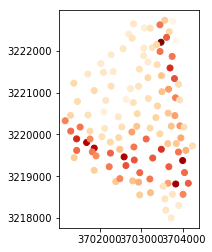

In [34]:
geometry = [Point(xy) for xy in zip(ss.X, ss.Y)]
crs = {'init': 'epsg:4326'}
ss = gpd.GeoDataFrame(ss, crs=crs, geometry=geometry)

#convert to 3035
ss = ss.to_crs({'init': 'epsg:3035'})

ss['Xp']= ss.geometry.apply(lambda p: p.x)
ss['Yp'] = ss.geometry.apply(lambda p: p.y)

ss.plot(column='Depth',cmap='OrRd')
plt.show()

In [35]:
#finding the grid square each sounding in ss is in, saving these hit locations to location

ss['NearestC'] =(ss['Xp'] - minx) /stepxhog
ss['NearestR'] =(ss['Yp'] - miny) /stepyhog

locations = ss.loc[:,['NearestC','NearestR']]

In [36]:
locations.head()

,NearestC,NearestR
0,56.066035,94.734579
1,7.077886,74.453915
2,5.522509,59.044433
3,13.872469,59.230981
4,8.829260,65.705390


In [37]:
floored_locations= locations.apply(np.floor)

In [38]:
len(floored_locations)

117

In [39]:
zero_data = np.zeros(shape=(len(floored_locations),28))
positives = pd.DataFrame(zero_data, columns=['A', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10','C11','C12', 'C13','C14','C15', 'C16', 'DN', 'DB', 'mindep'])
#positives = pd.DataFrame()

In [40]:
fC = floored_locations.iloc[2][0]
fR = floored_locations.iloc[2][1]

In [41]:
# A = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['0']].values

In [42]:
#angles
B1a = 90
B2a = 135
B3a = 0
B4a = 45
B5a =90
B6a = 135
B7a = 0
B8a = 45
C1a = 90
C2a = 116.6
C3a =135
C4a =153.4
C5a =0
C6a =26.6
C7a =45
C8a =63.4
C9a = 90
C10a = 116.6
C11a = 135
C12a =153.6
C13a = 0 
C14a = 26.6
C15a =45
C16a =63.4

In [43]:
#create a test dataset which has the nearest 25 cells
#this is the old method - gives all 4 of the directions

for i in range(0,len(floored_locations)):
    fC = floored_locations.iloc[i][0]
    fR = floored_locations.iloc[i][1]
    
     ####Nneed to ask about - using max? or should use the mean? equal weighting
    g = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['0','90','45','135']].values
    positives.loc[i,['A']] = g.max()
    
    #B1
    if fR-1 in range(0,rowH) and fC in range(0,colH):
        #dataframe of cell
        B1 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB1 = (abs(math.cos(math.radians(0-B1a))) * float(B1['0'].values))+ (abs(math.cos(math.radians(45-B1a))) * float(B1['45'].values))+ (abs(math.cos(math.radians(90-B1a))) * float(B1['90'].values)) + (abs(math.cos(math.radians(135-B1a))) * float(B1['135'].values))
        positives.loc[i,['B1']] = waB1
    else:
        positives.loc[i,['B1']] = 0
        
    #B2
    if fR-1 in range(0,rowH) and fC+1 in range(0,colH):
        #dataframe of cell
        B2 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB2 = (abs(math.cos(math.radians(0-B2a))) * float(B2['0'].values))+ (abs(math.cos(math.radians(45-B2a))) * float(B2['45'].values))+ (abs(math.cos(math.radians(90-B2a))) * float(B2['90'].values)) + (abs(math.cos(math.radians(135-B2a))) * float(B2['135'].values))
        positives.loc[i,['B2']] = waB2
    else:
        positives.loc[i,['B2']] = 0

    #B3
    if fR in range(0,rowH) and fC+1 in range(0,colH):
        #dataframe of cell
        B3 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB3 = (abs(math.cos(math.radians(0-B3a))) * float(B3['0'].values))+ (abs(math.cos(math.radians(45-B3a))) * float(B3['45'].values))+ (abs(math.cos(math.radians(90-B3a))) * float(B3['90'].values)) + (abs(math.cos(math.radians(135-B3a))) * float(B3['135'].values))
        positives.loc[i,['B3']] = waB3
    else:
        positives.loc[i,['B3']] = 0

    #B4
    if fR+1 in range(0,rowH) and fC+1 in range(0,colH):
        #dataframe of cell
        B4 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB4 = (abs(math.cos(math.radians(0-B4a))) * float(B4['0'].values))+ (abs(math.cos(math.radians(45-B4a))) * float(B4['45'].values))+ (abs(math.cos(math.radians(90-B4a))) * float(B4['90'].values)) + (abs(math.cos(math.radians(135-B4a))) * float(B4['135'].values))
        positives.loc[i,['B4']] = waB4
    else:
        positives.loc[i,['B4']] = 0
        
    #B5
    if fR+1 in range(0,rowH) and fC in range(0,colH):
        #dataframe of cell
        B5 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB5 = (abs(math.cos(math.radians(0-B5a))) * float(B5['0'].values))+ (abs(math.cos(math.radians(45-B5a))) * float(B5['45'].values))+ (abs(math.cos(math.radians(90-B5a))) * float(B5['90'].values)) + (abs(math.cos(math.radians(135-B5a))) * float(B5['135'].values))
        positives.loc[i,['B5']] = waB5
    else:
        positives.loc[i,['B5']] = 0

    #B6
    if fR+1 in range(0,rowH) and fC-1 in range(0,colH):
        #dataframe of cell
        B6 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB6 = (abs(math.cos(math.radians(0-B6a))) * float(B6['0'].values))+ (abs(math.cos(math.radians(45-B6a))) * float(B6['45'].values))+ (abs(math.cos(math.radians(90-B6a))) * float(B6['90'].values)) + (abs(math.cos(math.radians(135-B6a))) * float(B6['135'].values))
        positives.loc[i,['B6']] = waB6
    else:
        positives.loc[i,['B6']] = 0

    #B7
    if fR in range(0,rowH) and fC-1 in range(0,colH):
        #dataframe of cell
        B7 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB7 = (abs(math.cos(math.radians(0-B7a))) * float(B7['0'].values))+ (abs(math.cos(math.radians(45-B7a))) * float(B7['45'].values))+ (abs(math.cos(math.radians(90-B7a))) * float(B7['90'].values)) + (abs(math.cos(math.radians(135-B7a))) * float(B7['135'].values))
        positives.loc[i,['B7']] = waB7
    else:
        positives.loc[i,['B7']] = 0

    #B8
    if fR-1 in range(0,rowH) and fC-1 in range(0,colH):
        #dataframe of cell
        B8 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB8 = (abs(math.cos(math.radians(0-B8a))) * float(B8['0'].values))+ (abs(math.cos(math.radians(45-B8a))) * float(B8['45'].values))+ (abs(math.cos(math.radians(90-B8a))) * float(B8['90'].values)) + (abs(math.cos(math.radians(135-B8a))) * float(B8['135'].values))
        positives.loc[i,['B8']] = waB8
    else:
        positives.loc[i,['B8']] = 0
        
    #C1
    if fR-2 in range(0,rowH) and fC in range(0,colH):
        C1 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        waC1 = (abs(math.cos(math.radians(0-C1a))) * float(C1['0'].values))+ (abs(math.cos(math.radians(45-C1a))) * float(C1['45'].values))+ (abs(math.cos(math.radians(90-C1a))) * float(C1['90'].values)) + (abs(math.cos(math.radians(135-C1a))) * float(C1['135'].values))
        positives.loc[i,['C1']] = waC1
    else:
        positives.loc[i,['C1']] = 0
    
    #C2
    if fR-2 in range(0,rowH) and fC+1 in range(0,colH):
        C2 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        waC2 = (abs(math.cos(math.radians(0-C2a))) * float(C2['0'].values))+ (abs(math.cos(math.radians(45-C2a))) * float(C2['45'].values))+ (abs(math.cos(math.radians(90-C2a))) * float(C2['90'].values)) + (abs(math.cos(math.radians(135-C2a))) * float(C2['135'].values))
        positives.loc[i,['C2']] = waC2
    else:
        positives.loc[i,['C2']] = 0
    
    #C3
    if fR-2 in range(0,rowH) and fC+2 in range(0,colH):
        C3 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC3 = (abs(math.cos(math.radians(0-C3a))) * float(C3['0'].values))+ (abs(math.cos(math.radians(45-C3a))) * float(C3['45'].values))+ (abs(math.cos(math.radians(90-C3a))) * float(C3['90'].values)) + (abs(math.cos(math.radians(135-C3a))) * float(C3['135'].values))
        positives.loc[i,['C3']] = waC3
    else:
        positives.loc[i,['C3']] = 0
    
    #C4
    if fR-1 in range(0,rowH) and fC+2 in range(0,colH):
        C4 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC4 = (abs(math.cos(math.radians(0-C4a))) * float(C4['0'].values))+ (abs(math.cos(math.radians(45-C4a))) * float(C4['45'].values))+ (abs(math.cos(math.radians(90-C4a))) * float(C4['90'].values)) + (abs(math.cos(math.radians(135-C4a))) * float(C4['135'].values))
        positives.loc[i,['C4']] = waC4
    else:
        positives.loc[i,['C4']] = 0
        
    #C5
    if fR in range(0,rowH) and fC+2 in range(0,colH):
        C5 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC5 = (abs(math.cos(math.radians(0-C5a))) * float(C5['0'].values))+ (abs(math.cos(math.radians(45-C5a))) * float(C5['45'].values))+ (abs(math.cos(math.radians(90-C5a))) * float(C5['90'].values)) + (abs(math.cos(math.radians(135-C5a))) * float(C5['135'].values))
        positives.loc[i,['C5']] = waC5
    else:
        positives.loc[i,['C5']] = 0
        
    #C6
    if fR+1 in range(0,rowH) and fC+2 in range(0,colH):
        C6 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC6 = (abs(math.cos(math.radians(0-C6a))) * float(C6['0'].values))+ (abs(math.cos(math.radians(45-C6a))) * float(C6['45'].values))+ (abs(math.cos(math.radians(90-C6a))) * float(C6['90'].values)) + (abs(math.cos(math.radians(135-C6a))) * float(C6['135'].values))
        positives.loc[i,['C6']] = waC6
    else:
        positives.loc[i,['C6']] = 0
        
    #C7
    if fR+2 in range(0,rowH) and fC+2 in range(0,colH):
        C7 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC7 = (abs(math.cos(math.radians(0-C7a))) * float(C7['0'].values))+ (abs(math.cos(math.radians(45-C7a))) * float(C7['45'].values))+ (abs(math.cos(math.radians(90-C7a))) * float(C7['90'].values)) + (abs(math.cos(math.radians(135-C7a))) * float(C7['135'].values))
        positives.loc[i,['C7']] = waC7
    else:
        positives.loc[i,['C7']] = 0
        
    #C8
    if fR+2 in range(0,rowH) and fC+1 in range(0,colH):
        C8 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        waC8 = (abs(math.cos(math.radians(0-C8a))) * float(C8['0'].values))+ (abs(math.cos(math.radians(45-C8a))) * float(C8['45'].values))+ (abs(math.cos(math.radians(90-C8a))) * float(C8['90'].values)) + (abs(math.cos(math.radians(135-C8a))) * float(C8['135'].values))
        positives.loc[i,['C8']] = waC8
    else:
        positives.loc[i,['C8']] = 0
        
    #C9
    if fR+2 in range(0,rowH) and fC in range(0,colH):
        C9 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        waC9 = (abs(math.cos(math.radians(0-C9a))) * float(C9['0'].values))+ (abs(math.cos(math.radians(45-C9a))) * float(C9['45'].values))+ (abs(math.cos(math.radians(90-C9a))) * float(C9['90'].values)) + (abs(math.cos(math.radians(135-C9a))) * float(C9['135'].values))
        positives.loc[i,['C9']] = waC9
    else:
        positives.loc[i,['C9']] = 0
        
    #C10
    if fR+2 in range(0,rowH) and fC-1 in range(0,colH):
        C10 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        waC10 = (abs(math.cos(math.radians(0-C10a))) * float(C10['0'].values))+ (abs(math.cos(math.radians(45-C10a))) * float(C10['45'].values))+ (abs(math.cos(math.radians(90-C10a))) * float(C10['90'].values)) + (abs(math.cos(math.radians(135-C10a))) * float(C10['135'].values))
        positives.loc[i,['C10']] = waC10
    else:
        positives.loc[i,['C10']] = 0
        
    #C11
    if fR+2 in range(0,rowH) and fC-2 in range(0,colH):
        C11 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC11 = (abs(math.cos(math.radians(0-C11a))) * float(C11['0'].values))+ (abs(math.cos(math.radians(45-C11a))) * float(C11['45'].values))+ (abs(math.cos(math.radians(90-C11a))) * float(C11['90'].values)) + (abs(math.cos(math.radians(135-C11a))) * float(C11['135'].values))
        positives.loc[i,['C11']] = waC11
    else:
        positives.loc[i,['C11']] = 0
        
    #C12
    if fR+1 in range(0,rowH) and fC-2 in range(0,colH):
        C12 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC12 = (abs(math.cos(math.radians(0-C12a))) * float(C12['0'].values))+ (abs(math.cos(math.radians(45-C12a))) * float(C12['45'].values))+ (abs(math.cos(math.radians(90-C12a))) * float(C12['90'].values)) + (abs(math.cos(math.radians(135-C12a))) * float(C12['135'].values))
        positives.loc[i,['C12']] = waC12
    else:
        positives.loc[i,['C12']] = 0
        
    #C13
    if fR in range(0,rowH) and fC-2 in range(0,colH):
        C13 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC13 = (abs(math.cos(math.radians(0-C13a))) * float(C13['0'].values))+ (abs(math.cos(math.radians(45-C13a))) * float(C13['45'].values))+ (abs(math.cos(math.radians(90-C13a))) * float(C13['90'].values)) + (abs(math.cos(math.radians(135-C13a))) * float(C13['135'].values))
        positives.loc[i,['C13']] = waC13
    else:
        positives.loc[i,['C13']] = 0
        
    #C14
    if fR-1 in range(0,rowH) and fC-2 in range(0,colH):
        C14 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC14 = (abs(math.cos(math.radians(0-C14a))) * float(C14['0'].values))+ (abs(math.cos(math.radians(45-C14a))) * float(C14['45'].values))+ (abs(math.cos(math.radians(90-C14a))) * float(C14['90'].values)) + (abs(math.cos(math.radians(135-C14a))) * float(C14['135'].values))
        positives.loc[i,['C14']] = waC14
    else:
        positives.loc[i,['C14']] = 0
        
    #C15
    if fR-2 in range(0,rowH) and fC-2 in range(0,colH):
        C15 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC15 = (abs(math.cos(math.radians(0-C15a))) * float(C15['0'].values))+ (abs(math.cos(math.radians(45-C15a))) * float(C15['45'].values))+ (abs(math.cos(math.radians(90-C15a))) * float(C15['90'].values)) + (abs(math.cos(math.radians(135-C15a))) * float(C15['135'].values))
        positives.loc[i,['C15']] = waC15
    else:
        positives.loc[i,['C15']] = 0
        
    #C16
    if fR-2 in range(0,rowH) and fC-1 in range(0,colH):
        C16 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        waC16 = (abs(math.cos(math.radians(0-C16a))) * float(C16['0'].values))+ (abs(math.cos(math.radians(45-C16a))) * float(C16['45'].values))+ (abs(math.cos(math.radians(90-C16a))) * float(C16['90'].values)) + (abs(math.cos(math.radians(135-C16a))) * float(C16['135'].values))
        positives.loc[i,['C16']] = waC16
    else:
        positives.loc[i,['C16']] = 0
        
    
        
# simple method for single directions - just taking that one direction       
# positives.loc[i,['B1']] = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR-1 in range(0,row) and fC in range(0,col) else 0
#   positives.loc[i,['B2']] = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC+1))].loc[:,['135']].values if fR-1 in range(0,row) and fC+1 in range(0,col) else 0
#     positives.loc[i,['B3']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC+1))].loc[:,['0']].values if fR in range(0,row) and fC+1 in range(0,col) else 0
#     positives.loc[i,['B4']] = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC+1))].loc[:,['45']].values if fR+1 in range(0,row) and fC+1 in range(0,col) else 0
#     positives.loc[i,['B5']] = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR+1 in range(0,row) and fC in range(0,col) else 0
#     positives.loc[i,['B6']] = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC-1))].loc[:,['135']].values if fR+1 in range(0,row) and fC-1 in range(0,col) else 0
#     positives.loc[i,['B7']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC-1))].loc[:,['0']].values if fR in range(0,row) and fC-1 in range(0,col) else 0
#     positives.loc[i,['B8']] = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC-1))].loc[:,['45']].values if fR-1 in range(0,row) and fC-1 in range(0,col) else 0
    
#     positives.loc[i,['C1']] =  HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR-2 in range(0,row) and fC in range(0,col) else 0
#     positives.loc[i,['C3']] =HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC+2))].loc[:,['135']].values if fR-2 in range(0,row) and fC+2 in range(0,col) else 0
#     positives.loc[i,['C5']] =HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC+2))].loc[:,['0']].values if fR in range(0,row) and fC+2 in range(0,col) else 0
#     positives.loc[i,['C7']] =HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC+2))].loc[:,['45']].values if fR+2 in range(0,row) and fC+2 in range(0,col) else 0
#     positives.loc[i,['C9']] =HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR+2 in range(0,row) and fC in range(0,col) else 0
#     positives.loc[i,['C11']] =HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC-2))].loc[:,['135']].values if fR+2 in range(0,row) and fC-2 in range(0,col) else 0
#     positives.loc[i,['C13']] =HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC-2))].loc[:,['0']].values if fR in range(0,row) and fC-2 in range(0,col) else 0
#     positives.loc[i,['C15']] =HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC-2))].loc[:,['45']].values if fR-2 in range(0,row) and fC-2 in range(0,col) else 0
    
    positives.loc[i,['DN']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['DN']].values
    
    positives.loc[i,['DB']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['DB']].values
    
    positives.loc[i,['mindep']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['mindep']].values
    

In [44]:
positives

,A,B1,B2,B3,B4,B5,B6,B7,B8,C1,...,C10,C11,C12,C13,C14,C15,C16,DN,DB,mindep
0,0.826141,2.219646e-01,5.177365e-01,0.933949,0.755573,2.541420e-02,7.070621e-01,0.999955,0.707085,1.162385e-01,...,0.447725,7.070660e-01,0.895678,0.999968,0.894120,0.541041,0.595053,8.0,8.0,0.324
1,0.330347,6.725393e-01,3.020445e-01,0.566199,0.965682,6.972564e-01,0.000000e+00,0.000000,0.670995,3.614483e-01,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0,3.185
2,0.513218,5.306411e-01,7.244975e-01,0.598317,0.627312,6.770694e-01,0.000000e+00,0.000000,0.947178,4.124280e-01,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.696027,8.0,8.0,3.484
3,0.474407,3.361013e-01,7.558920e-01,0.845003,0.578669,5.789492e-01,7.423395e-01,0.965385,0.549484,1.635573e-01,...,0.747504,7.577721e-01,0.777859,0.825949,0.822250,0.331658,0.584299,8.0,8.0,2.633
4,0.797216,6.709154e-01,6.347340e-01,0.397320,0.851159,5.576879e-01,3.029074e-01,0.731412,0.556998,5.551176e-01,...,0.478532,5.838359e-01,0.574608,0.542408,0.784406,0.854873,0.581259,8.0,8.0,2.958
5,0.807690,8.203371e-01,2.689352e-01,0.424187,0.548027,7.598901e-01,2.914555e-01,0.595458,0.856195,7.069219e-01,...,0.720376,7.206423e-01,0.474695,0.239572,0.948581,0.943354,0.945711,8.0,8.0,2.245
6,0.401237,8.211265e-01,4.013501e-01,0.264421,0.571002,4.789357e-01,7.911854e-01,0.642133,0.663456,7.581374e-01,...,0.387292,4.145916e-01,0.500602,0.630491,0.580883,0.856575,0.542252,8.0,8.0,3.179
7,0.608641,6.118696e-01,6.237185e-01,0.264255,0.935767,7.395096e-01,4.989470e-01,0.512638,0.309729,7.011561e-01,...,0.469984,4.062703e-01,0.556513,0.448089,0.547722,0.597968,0.688231,8.0,8.0,2.340
8,0.942267,8.628926e-01,6.122482e-17,0.737628,0.425984,8.025316e-01,8.252685e-01,0.649778,0.524748,5.425645e-01,...,0.727926,4.899409e-01,0.523903,0.486194,0.773589,0.521136,0.635999,8.0,8.0,1.892
9,0.872823,8.845228e-01,2.410006e-01,0.414971,0.000000,7.587335e-01,3.159068e-01,0.598328,0.655846,8.228175e-01,...,0.000000,0.000000e+00,0.415367,0.201174,0.643734,0.769487,0.857673,8.0,8.0,1.938


In [45]:
o = positives.isnull().sum().sum()
print(o)

0


In [46]:
if o > 0:
    #convert nans to 0
    positives = positives.fillna(0)

In [47]:
positives['Selection']=1

In [48]:
positives

,A,B1,B2,B3,B4,B5,B6,B7,B8,C1,...,C11,C12,C13,C14,C15,C16,DN,DB,mindep,Selection
0,0.826141,2.219646e-01,5.177365e-01,0.933949,0.755573,2.541420e-02,7.070621e-01,0.999955,0.707085,1.162385e-01,...,7.070660e-01,0.895678,0.999968,0.894120,0.541041,0.595053,8.0,8.0,0.324,1
1,0.330347,6.725393e-01,3.020445e-01,0.566199,0.965682,6.972564e-01,0.000000e+00,0.000000,0.670995,3.614483e-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0,3.185,1
2,0.513218,5.306411e-01,7.244975e-01,0.598317,0.627312,6.770694e-01,0.000000e+00,0.000000,0.947178,4.124280e-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.696027,8.0,8.0,3.484,1
3,0.474407,3.361013e-01,7.558920e-01,0.845003,0.578669,5.789492e-01,7.423395e-01,0.965385,0.549484,1.635573e-01,...,7.577721e-01,0.777859,0.825949,0.822250,0.331658,0.584299,8.0,8.0,2.633,1
4,0.797216,6.709154e-01,6.347340e-01,0.397320,0.851159,5.576879e-01,3.029074e-01,0.731412,0.556998,5.551176e-01,...,5.838359e-01,0.574608,0.542408,0.784406,0.854873,0.581259,8.0,8.0,2.958,1
5,0.807690,8.203371e-01,2.689352e-01,0.424187,0.548027,7.598901e-01,2.914555e-01,0.595458,0.856195,7.069219e-01,...,7.206423e-01,0.474695,0.239572,0.948581,0.943354,0.945711,8.0,8.0,2.245,1
6,0.401237,8.211265e-01,4.013501e-01,0.264421,0.571002,4.789357e-01,7.911854e-01,0.642133,0.663456,7.581374e-01,...,4.145916e-01,0.500602,0.630491,0.580883,0.856575,0.542252,8.0,8.0,3.179,1
7,0.608641,6.118696e-01,6.237185e-01,0.264255,0.935767,7.395096e-01,4.989470e-01,0.512638,0.309729,7.011561e-01,...,4.062703e-01,0.556513,0.448089,0.547722,0.597968,0.688231,8.0,8.0,2.340,1
8,0.942267,8.628926e-01,6.122482e-17,0.737628,0.425984,8.025316e-01,8.252685e-01,0.649778,0.524748,5.425645e-01,...,4.899409e-01,0.523903,0.486194,0.773589,0.521136,0.635999,8.0,8.0,1.892,1
9,0.872823,8.845228e-01,2.410006e-01,0.414971,0.000000,7.587335e-01,3.159068e-01,0.598328,0.655846,8.228175e-01,...,0.000000e+00,0.415367,0.201174,0.643734,0.769487,0.857673,8.0,8.0,1.938,1


In [49]:
positives.to_csv(savepath+"HOGpositives_"+survey+"_25_"+str(step)+"m_o4p5b1_"+str(breakdown)+".csv")

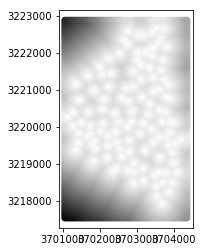

In [50]:
HOGgeo['distoss'] = HOGgeo.geometry.apply(lambda g: ss.distance(g).min())
HOGgeo.plot(column='distoss',cmap='binary')
plt.show()

In [51]:
negatives = pd.DataFrame(zero_data, columns=['A', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10','C11','C12', 'C13','C14','C15', 'C16', 'DN', 'DB', 'mindep'])

In [52]:
Potential_neg = HOGgeo[(HOGgeo.distoss> 80) & (HOGgeo.distoss< 600)]

print(len(Potential_neg))

5150


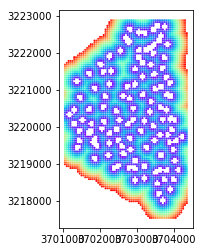

In [53]:
Potential_neg.plot( column='distoss',cmap='rainbow',markersize=1)
plt.show()

In [54]:
 #reset indexes
Potential_neg.reset_index(drop=True, inplace=True)  

In [55]:
negs = int(len(ss)*1.5)
print (negs)

175


In [56]:
from random import randint
t=[randint(0,len(Potential_neg)) for p in range(0,negs)]
print (t)

[4066, 324, 4631, 5006, 1346, 1083, 371, 2944, 1545, 4987, 1882, 4473, 2184, 108, 1514, 4365, 2508, 3179, 3926, 1146, 2493, 1280, 4296, 3183, 1668, 151, 3016, 1544, 2363, 1017, 268, 4930, 435, 797, 1243, 1238, 4579, 786, 1058, 4529, 3223, 2965, 3598, 4597, 5043, 4963, 1127, 1370, 3173, 3394, 3690, 2796, 3519, 3601, 4777, 969, 535, 3803, 4685, 1315, 1406, 3958, 2993, 1863, 2982, 4865, 2770, 3448, 4761, 2369, 4042, 307, 792, 667, 510, 3428, 685, 47, 3647, 4398, 4278, 848, 270, 566, 1, 855, 3188, 1394, 1697, 4082, 1816, 3400, 831, 2420, 3273, 5130, 3037, 868, 5021, 3234, 1204, 4940, 3384, 2554, 3374, 4561, 811, 836, 685, 4849, 4976, 2297, 88, 2321, 43, 4167, 1886, 4398, 4195, 2844, 933, 4228, 4168, 795, 4142, 2832, 4411, 3328, 2217, 4108, 1059, 3711, 1617, 1767, 3705, 947, 3138, 2409, 1474, 2548, 4222, 3449, 1454, 3607, 1598, 2444, 3513, 5121, 1660, 2914, 4930, 1254, 3098, 2499, 551, 4692, 4348, 5086, 4750, 3238, 4981, 259, 1349, 392, 3457, 234, 1928, 869, 2391, 4027, 5120, 4737, 4960, 12

In [57]:
# select the rows at these indexes (t)
tempdf = pd.DataFrame()
for i in t:
    tempdf = tempdf.append(Potential_neg.iloc[i])

In [58]:
tempdf

,0,135,45,90,C,DB,DN,R,XA,XB,YA,YB,berth_dis,distoss,geometry,midX,midY,mindep,navlin_dis
4066,0.000000,0.000000,0.000000,0.000000,32.0,8.0,8.0,83.0,3.702629e+06,3.702679e+06,3.221655e+06,3.221705e+06,6000.0,319.363055,POINT (3702653.722151558 3221680.047541456),3.702654e+06,3.221680e+06,10000.000,6000.0
324,0.000000,0.000000,0.000000,0.000000,34.0,8.0,8.0,13.0,3.702729e+06,3.702779e+06,3.218155e+06,3.218205e+06,6000.0,425.957866,POINT (3702753.722151558 3218180.047541456),3.702754e+06,3.218180e+06,10000.000,6000.0
4631,0.864876,0.135090,0.000000,0.000000,45.0,8.0,8.0,94.0,3.703279e+06,3.703329e+06,3.222205e+06,3.222255e+06,6000.0,103.245390,POINT (3703303.722151558 3222230.047541456),3.703304e+06,3.222230e+06,3.305,6000.0
5006,0.000000,0.000000,0.000000,0.000000,37.0,8.0,8.0,104.0,3.702879e+06,3.702929e+06,3.222705e+06,3.222755e+06,6000.0,123.546024,POINT (3702903.722151558 3222730.047541456),3.702904e+06,3.222730e+06,1.676,6000.0
1346,0.000000,0.000000,0.000000,0.000000,9.0,8.0,8.0,34.0,3.701479e+06,3.701529e+06,3.219205e+06,3.219255e+06,6000.0,241.998965,POINT (3701503.722151558 3219230.047541456),3.701504e+06,3.219230e+06,10000.000,6000.0
1083,0.164754,0.026596,0.808616,0.000000,51.0,8.0,8.0,29.0,3.703579e+06,3.703629e+06,3.218955e+06,3.219005e+06,6000.0,149.871334,POINT (3703603.722151558 3218980.047541456),3.703604e+06,3.218980e+06,9.681,6000.0
371,0.000000,0.000000,0.000000,0.000000,45.0,8.0,8.0,14.0,3.703279e+06,3.703329e+06,3.218205e+06,3.218255e+06,6000.0,284.649636,POINT (3703303.722151558 3218230.047541456),3.703304e+06,3.218230e+06,1.182,6000.0
2944,0.999885,0.000000,0.000000,0.000000,54.0,8.0,8.0,63.0,3.703729e+06,3.703779e+06,3.220655e+06,3.220705e+06,6000.0,202.987396,POINT (3703753.722151558 3220680.047541456),3.703754e+06,3.220680e+06,6.102,6000.0
1545,0.219243,0.000000,0.705504,0.075084,38.0,8.0,8.0,37.0,3.702929e+06,3.702979e+06,3.219355e+06,3.219405e+06,6000.0,125.301347,POINT (3702953.722151558 3219380.047541456),3.702954e+06,3.219380e+06,8.861,6000.0
4987,0.000000,0.000000,0.000000,0.000000,61.0,8.0,8.0,103.0,3.704079e+06,3.704129e+06,3.222655e+06,3.222705e+06,6000.0,357.388777,POINT (3704103.722151558 3222680.047541456),3.704104e+06,3.222680e+06,10000.000,6000.0


In [59]:
negloc = tempdf.loc[:,['C','R']]

In [60]:
#reset indexes
negloc.reset_index(drop=True, inplace=True)  
#print(negloc)

In [61]:
for i in range(0,len(negloc)):
    nC = negloc.iloc[i][0]
    nR = negloc.iloc[i][1]
    
    ####Nneed to ask about - using max? or should use the mean? equal weighting
    f = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['0','90','45','135']].values
    negatives.loc[i,['A']] = f.max()
    
    #B1
    if nR-1 in range(0,rowH) and nC in range(0,colH):
        #datanRame of cell
        B1 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB1 = (abs(math.cos(math.radians(0-B1a))) * float(B1['0'].values))+ (abs(math.cos(math.radians(45-B1a))) * float(B1['45'].values))+ (abs(math.cos(math.radians(90-B1a))) * float(B1['90'].values)) + (abs(math.cos(math.radians(135-B1a))) * float(B1['135'].values))
        negatives.loc[i,['B1']] = wanB1
    else:
        negatives.loc[i,['B1']] = 0
        
    #B2
    if nR-1 in range(0,rowH) and nC+1 in range(0,colH):
        #datanRame of cell
        B2 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB2 = (abs(math.cos(math.radians(0-B2a))) * float(B2['0'].values))+ (abs(math.cos(math.radians(45-B2a))) * float(B2['45'].values))+ (abs(math.cos(math.radians(90-B2a))) * float(B2['90'].values)) + (abs(math.cos(math.radians(135-B2a))) * float(B2['135'].values))
        negatives.loc[i,['B2']] = wanB2
    else:
        negatives.loc[i,['B2']] = 0

    #B3
    if nR in range(0,rowH) and nC+1 in range(0,colH):
        #datanRame of cell
        B3 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB3 = (abs(math.cos(math.radians(0-B3a))) * float(B3['0'].values))+ (abs(math.cos(math.radians(45-B3a))) * float(B3['45'].values))+ (abs(math.cos(math.radians(90-B3a))) * float(B3['90'].values)) + (abs(math.cos(math.radians(135-B3a))) * float(B3['135'].values))
        negatives.loc[i,['B3']] = wanB3
    else:
        negatives.loc[i,['B3']] = 0

    #B4
    if nR+1 in range(0,rowH) and nC+1 in range(0,colH):
        #datanRame of cell
        B4 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB4 = (abs(math.cos(math.radians(0-B4a))) * float(B4['0'].values))+ (abs(math.cos(math.radians(45-B4a))) * float(B4['45'].values))+ (abs(math.cos(math.radians(90-B4a))) * float(B4['90'].values)) + (abs(math.cos(math.radians(135-B4a))) * float(B4['135'].values))
        negatives.loc[i,['B4']] = wanB4
    else:
        negatives.loc[i,['B4']] = 0
        
    #B5
    if nR+1 in range(0,rowH) and nC in range(0,colH):
        #datanRame of cell
        B5 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB5 = (abs(math.cos(math.radians(0-B5a))) * float(B5['0'].values))+ (abs(math.cos(math.radians(45-B5a))) * float(B5['45'].values))+ (abs(math.cos(math.radians(90-B5a))) * float(B5['90'].values)) + (abs(math.cos(math.radians(135-B5a))) * float(B5['135'].values))
        negatives.loc[i,['B5']] = wanB5
    else:
        negatives.loc[i,['B5']] = 0

    #B6
    if nR+1 in range(0,rowH) and nC-1 in range(0,colH):
        #datanRame of cell
        B6 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB6 = (abs(math.cos(math.radians(0-B6a))) * float(B6['0'].values))+ (abs(math.cos(math.radians(45-B6a))) * float(B6['45'].values))+ (abs(math.cos(math.radians(90-B6a))) * float(B6['90'].values)) + (abs(math.cos(math.radians(135-B6a))) * float(B6['135'].values))
        negatives.loc[i,['B6']] = wanB6
    else:
        negatives.loc[i,['B6']] = 0

    #B7
    if nR in range(0,rowH) and nC-1 in range(0,colH):
        #datanRame of cell
        B7 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB7 = (abs(math.cos(math.radians(0-B7a))) * float(B7['0'].values))+ (abs(math.cos(math.radians(45-B7a))) * float(B7['45'].values))+ (abs(math.cos(math.radians(90-B7a))) * float(B7['90'].values)) + (abs(math.cos(math.radians(135-B7a))) * float(B7['135'].values))
        negatives.loc[i,['B7']] = wanB7
    else:
        negatives.loc[i,['B7']] = 0

    #B8
    if nR-1 in range(0,rowH) and nC-1 in range(0,colH):
        #datanRame of cell
        B8 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB8 = (abs(math.cos(math.radians(0-B8a))) * float(B8['0'].values))+ (abs(math.cos(math.radians(45-B8a))) * float(B8['45'].values))+ (abs(math.cos(math.radians(90-B8a))) * float(B8['90'].values)) + (abs(math.cos(math.radians(135-B8a))) * float(B8['135'].values))
        negatives.loc[i,['B8']] = wanB8
    else:
        negatives.loc[i,['B8']] = 0
        
    #C1
    if nR-2 in range(0,rowH) and nC in range(0,colH):
        C1 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        wanC1 = (abs(math.cos(math.radians(0-C1a))) * float(C1['0'].values))+ (abs(math.cos(math.radians(45-C1a))) * float(C1['45'].values))+ (abs(math.cos(math.radians(90-C1a))) * float(C1['90'].values)) + (abs(math.cos(math.radians(135-C1a))) * float(C1['135'].values))
        negatives.loc[i,['C1']] = wanC1
    else:
        negatives.loc[i,['C1']] = 0
    
    #C2
    if nR-2 in range(0,rowH) and nC+1 in range(0,colH):
        C2 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        wanC2 = (abs(math.cos(math.radians(0-C2a))) * float(C2['0'].values))+ (abs(math.cos(math.radians(45-C2a))) * float(C2['45'].values))+ (abs(math.cos(math.radians(90-C2a))) * float(C2['90'].values)) + (abs(math.cos(math.radians(135-C2a))) * float(C2['135'].values))
        negatives.loc[i,['C2']] = wanC2
    else:
        negatives.loc[i,['C2']] = 0
    
    #C3
    if nR-2 in range(0,rowH) and nC+2 in range(0,colH):
        C3 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC3 = (abs(math.cos(math.radians(0-C3a))) * float(C3['0'].values))+ (abs(math.cos(math.radians(45-C3a))) * float(C3['45'].values))+ (abs(math.cos(math.radians(90-C3a))) * float(C3['90'].values)) + (abs(math.cos(math.radians(135-C3a))) * float(C3['135'].values))
        negatives.loc[i,['C3']] = wanC3
    else:
        negatives.loc[i,['C3']] = 0
    
    #C4
    if nR-1 in range(0,rowH) and nC+2 in range(0,colH):
        C4 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC4 = (abs(math.cos(math.radians(0-C4a))) * float(C4['0'].values))+ (abs(math.cos(math.radians(45-C4a))) * float(C4['45'].values))+ (abs(math.cos(math.radians(90-C4a))) * float(C4['90'].values)) + (abs(math.cos(math.radians(135-C4a))) * float(C4['135'].values))
        negatives.loc[i,['C4']] = wanC4
    else:
        negatives.loc[i,['C4']] = 0
        
    #C5
    if nR in range(0,rowH) and nC+2 in range(0,colH):
        C5 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC5 = (abs(math.cos(math.radians(0-C5a))) * float(C5['0'].values))+ (abs(math.cos(math.radians(45-C5a))) * float(C5['45'].values))+ (abs(math.cos(math.radians(90-C5a))) * float(C5['90'].values)) + (abs(math.cos(math.radians(135-C5a))) * float(C5['135'].values))
        negatives.loc[i,['C5']] = wanC5
    else:
        negatives.loc[i,['C5']] = 0
        
    #C6
    if nR+1 in range(0,rowH) and nC+2 in range(0,colH):
        C6 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC6 = (abs(math.cos(math.radians(0-C6a))) * float(C6['0'].values))+ (abs(math.cos(math.radians(45-C6a))) * float(C6['45'].values))+ (abs(math.cos(math.radians(90-C6a))) * float(C6['90'].values)) + (abs(math.cos(math.radians(135-C6a))) * float(C6['135'].values))
        negatives.loc[i,['C6']] = wanC6
    else:
        negatives.loc[i,['C6']] = 0
        
    #C7
    if nR+2 in range(0,rowH) and nC+2 in range(0,colH):
        C7 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC7 = (abs(math.cos(math.radians(0-C7a))) * float(C7['0'].values))+ (abs(math.cos(math.radians(45-C7a))) * float(C7['45'].values))+ (abs(math.cos(math.radians(90-C7a))) * float(C7['90'].values)) + (abs(math.cos(math.radians(135-C7a))) * float(C7['135'].values))
        negatives.loc[i,['C7']] = wanC7
    else:
        negatives.loc[i,['C7']] = 0
        
    #C8
    if nR+2 in range(0,rowH) and nC+1 in range(0,colH):
        C8 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        wanC8 = (abs(math.cos(math.radians(0-C8a))) * float(C8['0'].values))+ (abs(math.cos(math.radians(45-C8a))) * float(C8['45'].values))+ (abs(math.cos(math.radians(90-C8a))) * float(C8['90'].values)) + (abs(math.cos(math.radians(135-C8a))) * float(C8['135'].values))
        negatives.loc[i,['C8']] = wanC8
    else:
        negatives.loc[i,['C8']] = 0
        
    #C9
    if nR+2 in range(0,rowH) and nC in range(0,colH):
        C9 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        wanC9 = (abs(math.cos(math.radians(0-C9a))) * float(C9['0'].values))+ (abs(math.cos(math.radians(45-C9a))) * float(C9['45'].values))+ (abs(math.cos(math.radians(90-C9a))) * float(C9['90'].values)) + (abs(math.cos(math.radians(135-C9a))) * float(C9['135'].values))
        negatives.loc[i,['C9']] = wanC9
    else:
        negatives.loc[i,['C9']] = 0
        
    #C10
    if nR+2 in range(0,rowH) and nC-1 in range(0,colH):
        C10 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        wanC10 = (abs(math.cos(math.radians(0-C10a))) * float(C10['0'].values))+ (abs(math.cos(math.radians(45-C10a))) * float(C10['45'].values))+ (abs(math.cos(math.radians(90-C10a))) * float(C10['90'].values)) + (abs(math.cos(math.radians(135-C10a))) * float(C10['135'].values))
        negatives.loc[i,['C10']] = wanC10
    else:
        negatives.loc[i,['C10']] = 0
        
    #C11
    if nR+2 in range(0,rowH) and nC-2 in range(0,colH):
        C11 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC11 = (abs(math.cos(math.radians(0-C11a))) * float(C11['0'].values))+ (abs(math.cos(math.radians(45-C11a))) * float(C11['45'].values))+ (abs(math.cos(math.radians(90-C11a))) * float(C11['90'].values)) + (abs(math.cos(math.radians(135-C11a))) * float(C11['135'].values))
        negatives.loc[i,['C11']] = wanC11
    else:
        negatives.loc[i,['C11']] = 0
        
    #C12
    if nR+1 in range(0,rowH) and nC-2 in range(0,colH):
        C12 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC12 = (abs(math.cos(math.radians(0-C12a))) * float(C12['0'].values))+ (abs(math.cos(math.radians(45-C12a))) * float(C12['45'].values))+ (abs(math.cos(math.radians(90-C12a))) * float(C12['90'].values)) + (abs(math.cos(math.radians(135-C12a))) * float(C12['135'].values))
        negatives.loc[i,['C12']] = wanC12
    else:
        negatives.loc[i,['C12']] = 0
        
    #C13
    if nR in range(0,rowH) and nC-2 in range(0,colH):
        C13 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC13 = (abs(math.cos(math.radians(0-C13a))) * float(C13['0'].values))+ (abs(math.cos(math.radians(45-C13a))) * float(C13['45'].values))+ (abs(math.cos(math.radians(90-C13a))) * float(C13['90'].values)) + (abs(math.cos(math.radians(135-C13a))) * float(C13['135'].values))
        negatives.loc[i,['C13']] = wanC13
    else:
        negatives.loc[i,['C13']] = 0
        
    #C14
    if nR-1 in range(0,rowH) and nC-2 in range(0,colH):
        C14 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC14 = (abs(math.cos(math.radians(0-C14a))) * float(C14['0'].values))+ (abs(math.cos(math.radians(45-C14a))) * float(C14['45'].values))+ (abs(math.cos(math.radians(90-C14a))) * float(C14['90'].values)) + (abs(math.cos(math.radians(135-C14a))) * float(C14['135'].values))
        negatives.loc[i,['C14']] = wanC14
    else:
        negatives.loc[i,['C14']] = 0
        
    #C15
    if nR-2 in range(0,rowH) and nC-2 in range(0,colH):
        C15 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC15 = (abs(math.cos(math.radians(0-C15a))) * float(C15['0'].values))+ (abs(math.cos(math.radians(45-C15a))) * float(C15['45'].values))+ (abs(math.cos(math.radians(90-C15a))) * float(C15['90'].values)) + (abs(math.cos(math.radians(135-C15a))) * float(C15['135'].values))
        negatives.loc[i,['C15']] = wanC15
    else:
        negatives.loc[i,['C15']] = 0
        
    #C16
    if nR-2 in range(0,rowH) and nC-1 in range(0,colH):
        C16 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        wanC16 = (abs(math.cos(math.radians(0-C16a))) * float(C16['0'].values))+ (abs(math.cos(math.radians(45-C16a))) * float(C16['45'].values))+ (abs(math.cos(math.radians(90-C16a))) * float(C16['90'].values)) + (abs(math.cos(math.radians(135-C16a))) * float(C16['135'].values))
        negatives.loc[i,['C16']] = wanC16
    else:
        negatives.loc[i,['C16']] = 0
        
    negatives.loc[i,['DN']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['DN']].values
    
    negatives.loc[i,['DB']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['DB']].values
    
    negatives.loc[i,['mindep']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['mindep']].values

In [62]:
negatives

,A,B1,B2,B3,B4,B5,B6,B7,B8,C1,...,C10,C11,C12,C13,C14,C15,C16,DN,DB,mindep
0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0,10000.000
1,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0,10000.000
2,0.864876,1.103314e-01,8.089622e-01,0.791613,0.710250,1.071357e-01,7.477873e-01,0.869223,0.099905,6.123069e-17,...,0.462798,7.643386e-01,0.708351,0.541166,0.456945,0.265263,0.617139,8.0,8.0,3.305
3,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.385421,0.346751,8.0,8.0,1.676
4,0.000000,0.000000e+00,0.000000e+00,0.000000,0.999912,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0,10000.000
5,0.808616,8.900983e-01,7.399871e-02,0.716328,0.999916,7.070737e-01,1.134232e-01,0.818658,0.818895,8.912424e-01,...,0.424172,2.556527e-02,0.561964,0.896279,0.789185,0.724472,0.904444,8.0,8.0,9.681
6,0.000000,0.000000e+00,0.000000e+00,0.707061,0.975321,7.200793e-01,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.345022,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0,1.182
7,0.999885,6.122633e-17,5.931394e-01,0.999737,0.567982,6.122337e-17,7.070263e-01,0.999897,0.707027,6.122639e-17,...,0.512530,7.070226e-01,0.895614,0.999853,0.894029,0.706985,0.447710,8.0,8.0,6.102
8,0.705504,3.494294e-01,2.566220e-01,0.760584,0.803422,5.839358e-01,4.479761e-01,0.642610,0.868243,7.030199e-01,...,0.339808,6.122361e-17,0.555609,0.532521,0.948754,0.941563,0.919880,8.0,8.0,8.861
9,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,8.0,10000.000


In [63]:
negatives['Selection']=0

In [64]:
l = negatives.isnull().sum().sum()

In [65]:
if l > 0:
    #convert nans to 0
    negatives = negatives.fillna(0)

In [66]:
negatives.to_csv(savepath+"HOGnegatives_"+survey+"_25_"+str(step)+"m_o4p5b1_"+str(breakdown)+".csv")